In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

% matplotlib inline

In [6]:
class Hub(object): 
    def __init__(self, x, y, name=None):
        self.x = x
        self.y = y
        self.name = name

class Bike(object):
    
    def __init__(self, x, y, num):
        self.x = x
        self.y = y
        self.xDestination = None
        self.yDestination = None
        self.num = num
        self.isAvailable = 1
        
    def setDestination(self, xDestination, yDestination):
        self.xDestination = xDestination
        self.yDestination = yDestination
        self.isAvailable = 0
        print("Bike number {} has received a new destination.".format(self.num))

    def move(self):
        if self.isAvailable is 0:
            if self.xDestination > self.x:
                self.x += 1 
            elif self.xDestination < self.x:
                self.x -= 1
            elif self.yDestination > self.y:
                self.y += 1
            elif self.yDestination < self.y:
                self.y -= 1
            else: 
                self.isAvailable = 1

class City(object):
    def __init__(self, xrange=[0, 50], yrange=[0, 50], numBikes=70, numHubs=2, chanceHubs=0.5, name="Seattle"):
        self.xrange = xrange
        self.yrange = yrange
        self.numBikes = numBikes
        self.numHubs = numHubs
        self.chanceHubs = chanceHubs
        self.hubs = []
        self.bikes = []
        self.t = 0
        self.name = name
        self.x, self.y = np.meshgrid(np.arange(xrange[0], xrange[1]), np.arange(yrange[0], yrange[1]))
    
        self.createBikes()
        self.createHubs()
    
    def createBikes(self):
        for i, bike in enumerate(range(self.numBikes)):
            # Select random bike starting location from city grid
            x = np.random.choice(self.x.flatten())
            y = np.random.choice(self.y.flatten())
            self.bikes.append(Bike(x, y, i+1))
            
    def createHubs(self):
        for i, hub in enumerate(range(self.numHubs)):
            # Select random hub location from city grid
            x = np.random.choice(self.x.flatten())
            y = np.random.choice(self.y.flatten())
            self.hubs.append(Hub(x, y))
            
    def addDestinations(self, num): 
        if num > self.numBikes:
            num = self.numBikes
            
        for i, bike in enumerate(np.random.choice(self.bikes, num)):
            chance = np.random.rand(1)
            if chance > self.chanceHubs:
                bike.setDestination(np.random.choice(self.x.flatten()), np.random.choice(self.y.flatten()))
            else:
                hub = np.random.choice(self.hubs)
                bike.setDestination(hub.x, hub.y)
        
    def iterate(self):
        self.t += 1
        
        for bike in self.bikes: 
            bike.move()   
        return 
        
    def plotGrid(self):
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(10, 10)
        ax.scatter(self.x, self.y, alpha=0.3)
        
        for hub in self.hubs:
            ax.scatter(hub.x, hub.y, c="purple", s=150, alpha=0.5)
        
        for bike in self.bikes:
            if bike.isAvailable == 1:
                color = "green"
            else:
                color = "red" 
            ax.scatter(bike.x, bike.y, c=color)
            
        ax.set_xlim(self.xrange[0]-0.5, self.xrange[1])
        ax.set_ylim(self.yrange[0]-0.5, self.yrange[1])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title("t = {}".format(self.t))
        ax.set_axis_off()
        fig.savefig("images/{}_{:04}".format(self.name, self.t))

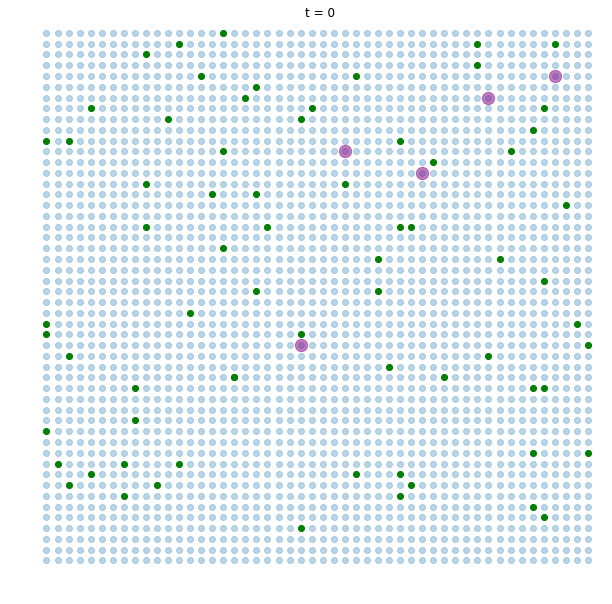

In [7]:
seattle = City(numBikes=70, numHubs=5)
seattle.plotGrid()

Bike number 47 has received a new destination.
Bike number 62 has received a new destination.
Bike number 52 has received a new destination.
Bike number 17 has received a new destination.
Bike number 39 has received a new destination.
Bike number 28 has received a new destination.
Bike number 43 has received a new destination.
Bike number 31 has received a new destination.
Bike number 59 has received a new destination.
Bike number 51 has received a new destination.
Bike number 29 has received a new destination.
Bike number 37 has received a new destination.
Bike number 16 has received a new destination.
Bike number 17 has received a new destination.
Bike number 32 has received a new destination.
Bike number 63 has received a new destination.
Bike number 55 has received a new destination.
Bike number 3 has received a new destination.
Bike number 27 has received a new destination.
Bike number 3 has received a new destination.
Bike number 15 has received a new destination.
Bike number 3 h

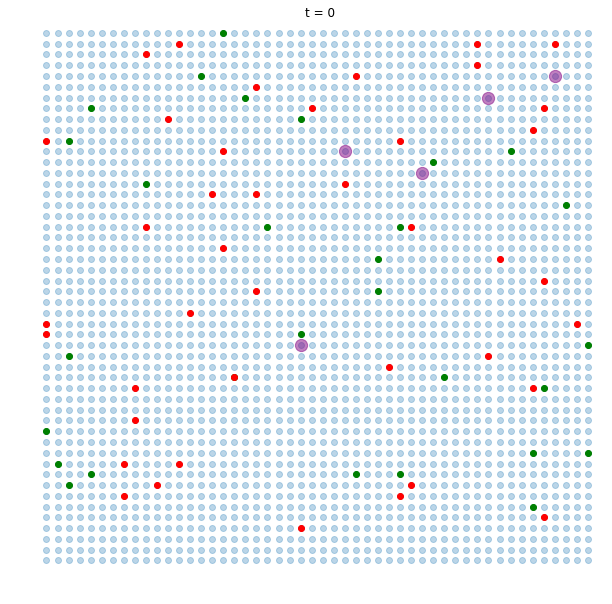

In [8]:
seattle.addDestinations(70)
seattle.plotGrid()

/Users/joachim/anaconda3/envs/lsst_dsfp_py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


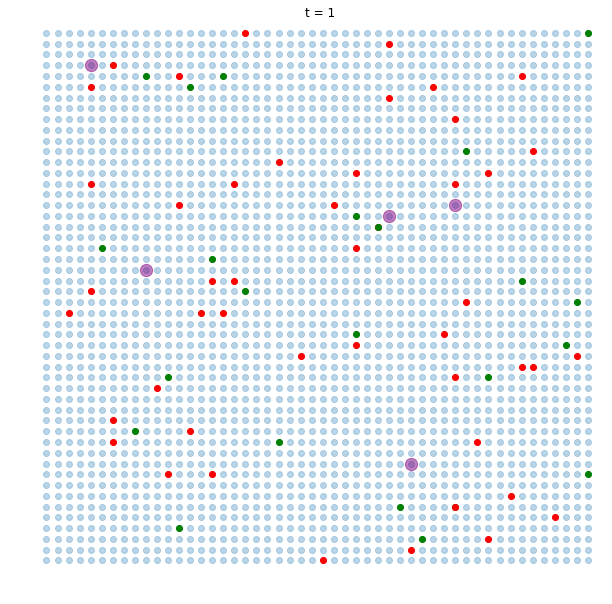

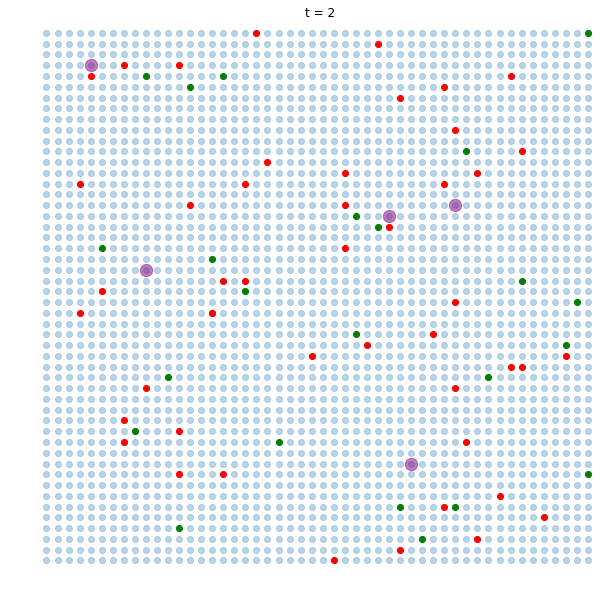

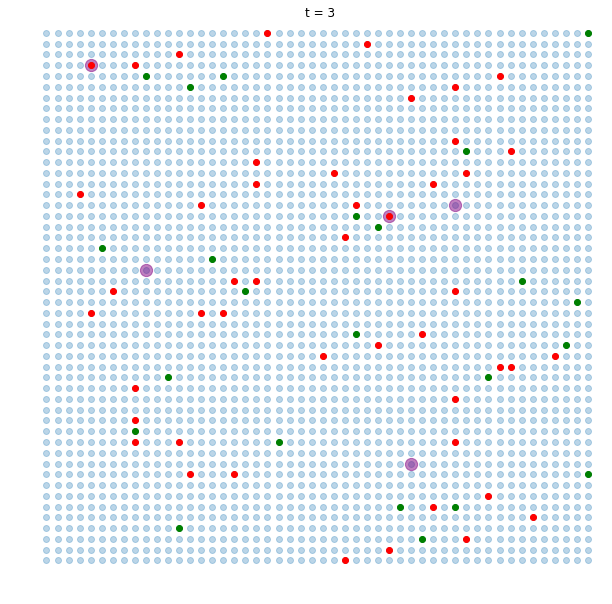

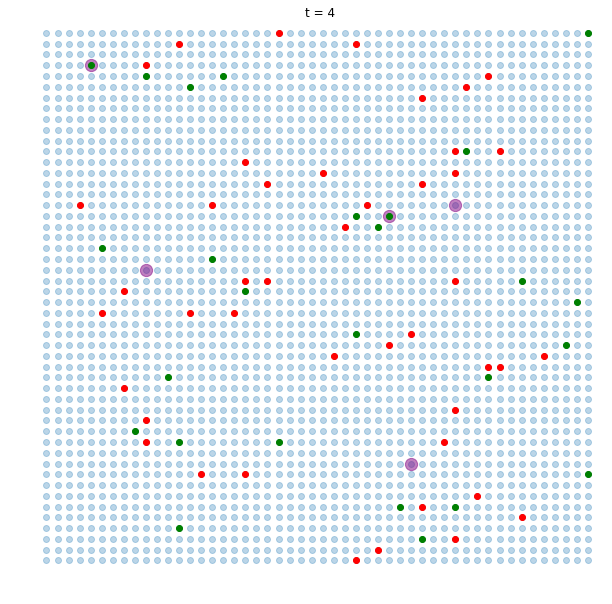

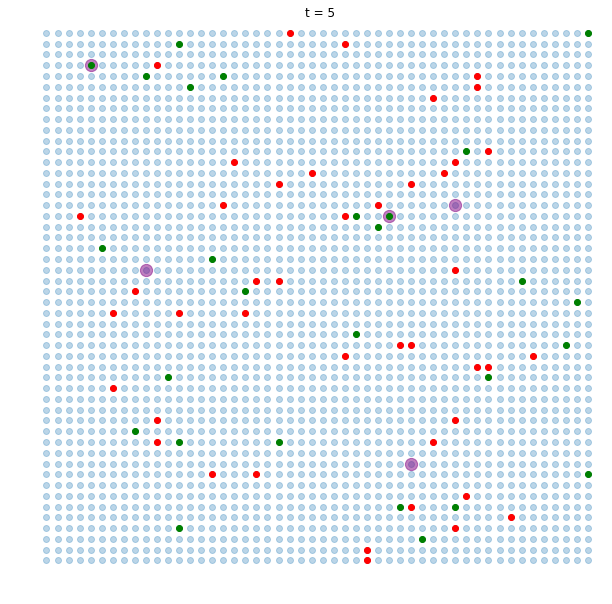

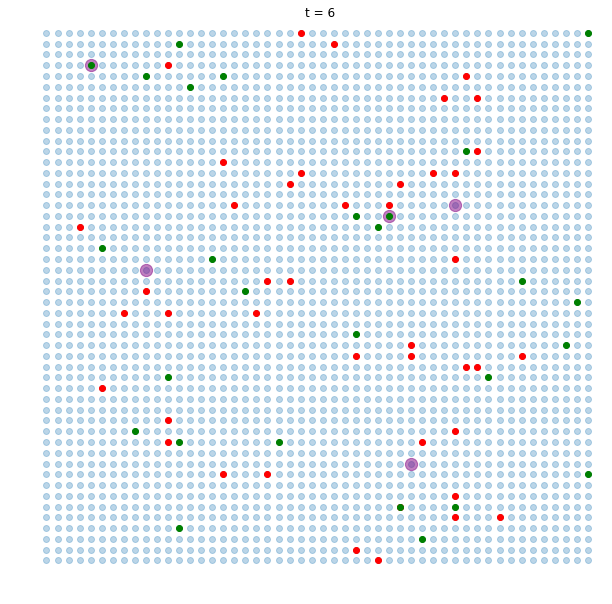

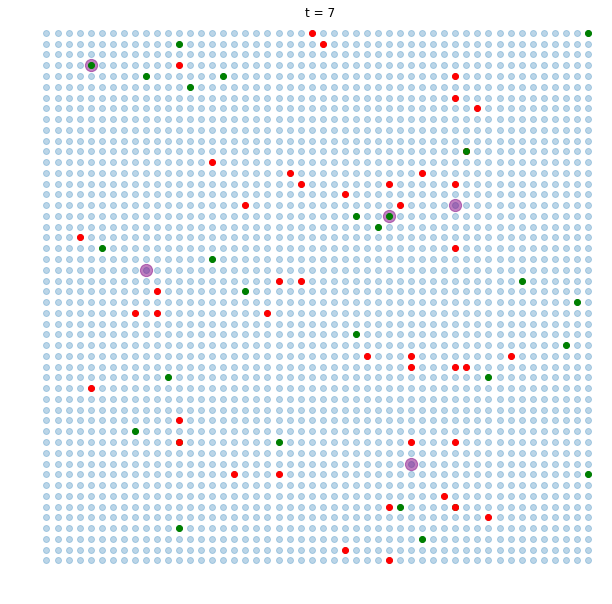

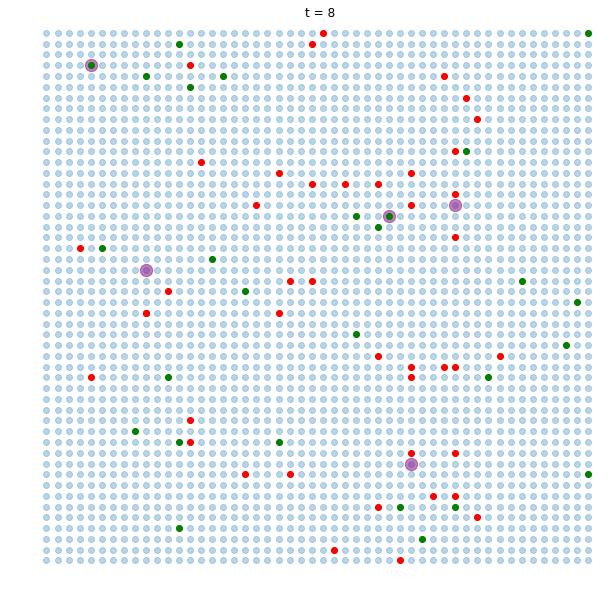

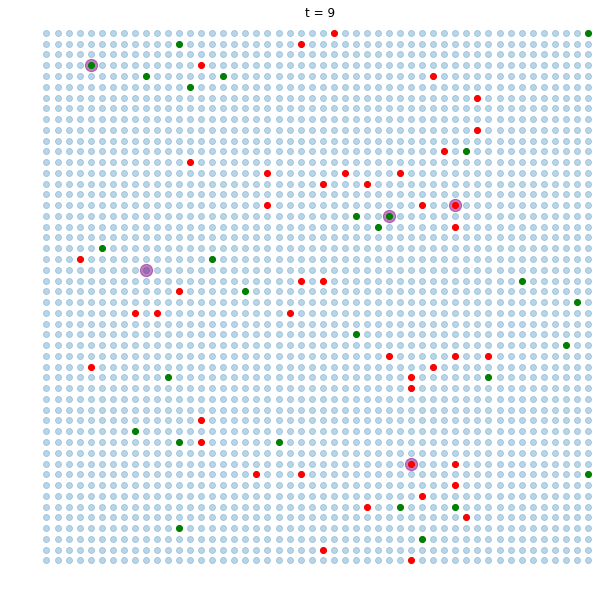

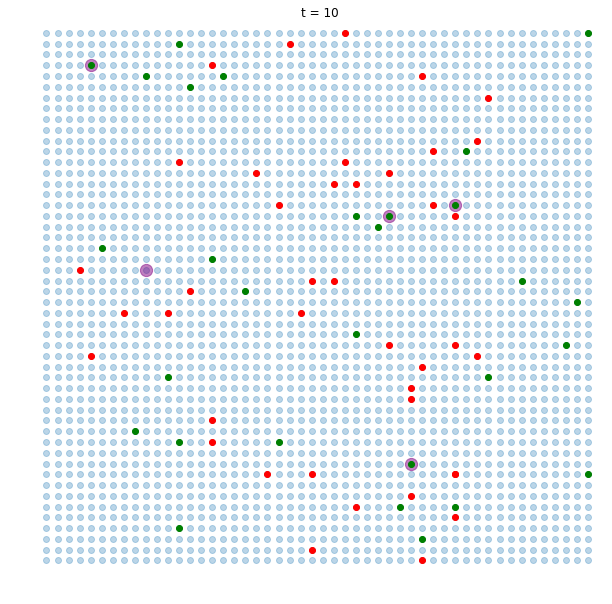

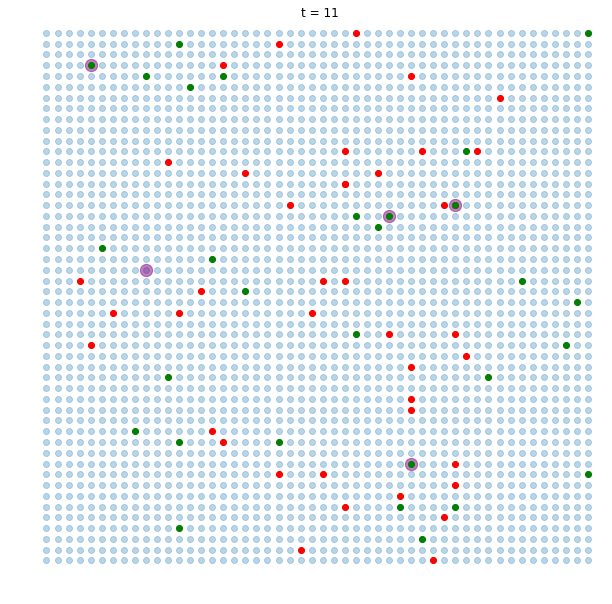

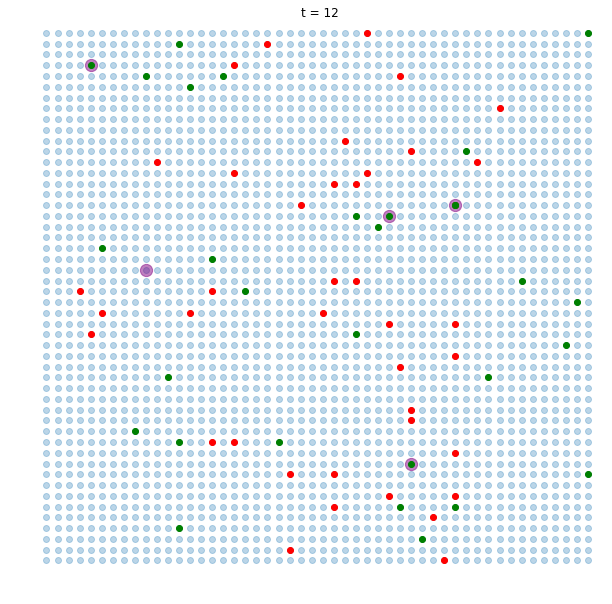

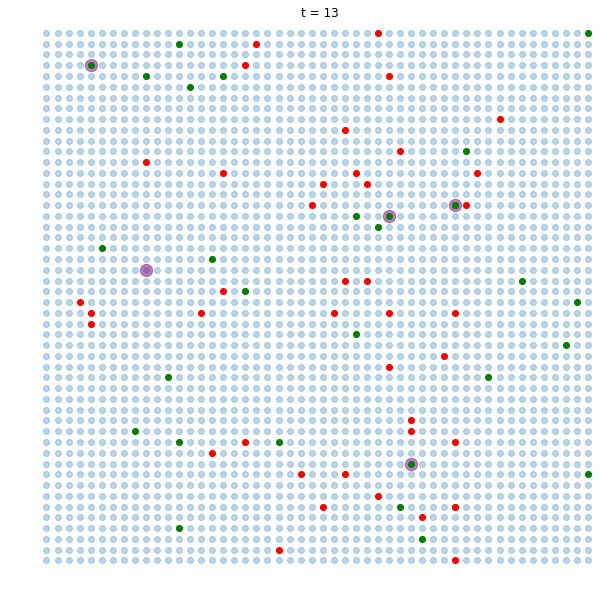

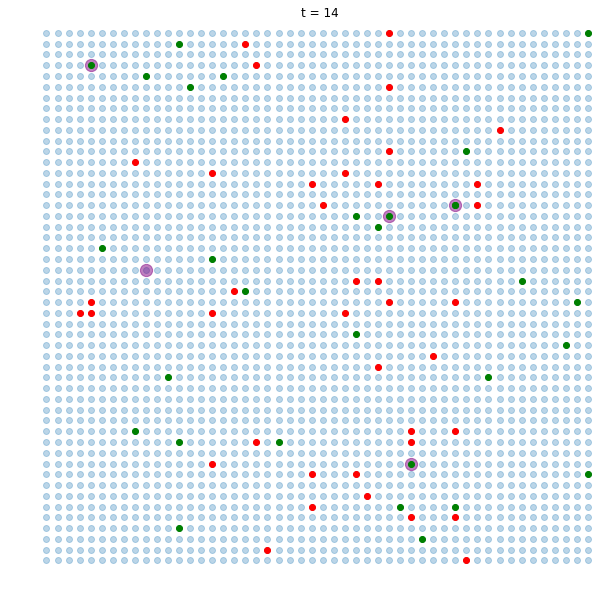

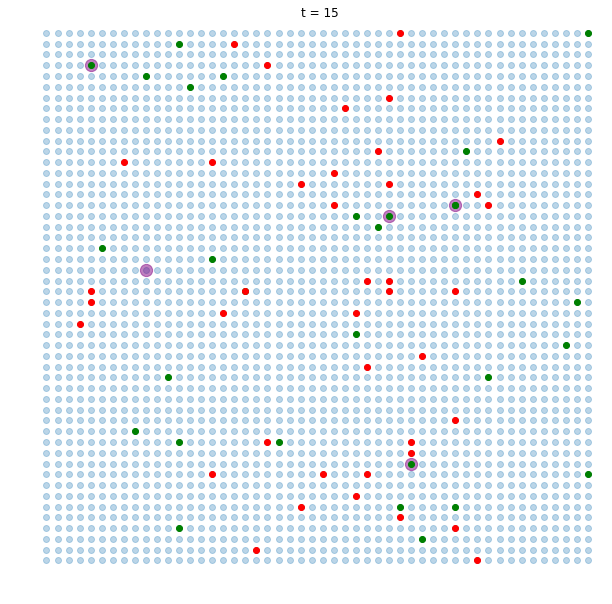

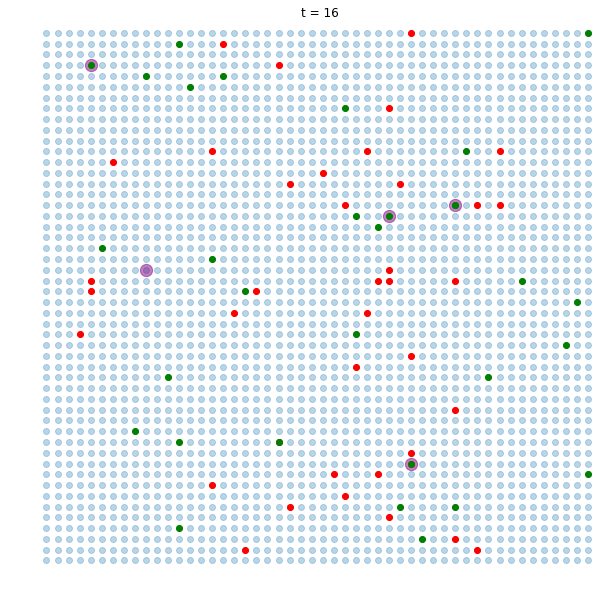

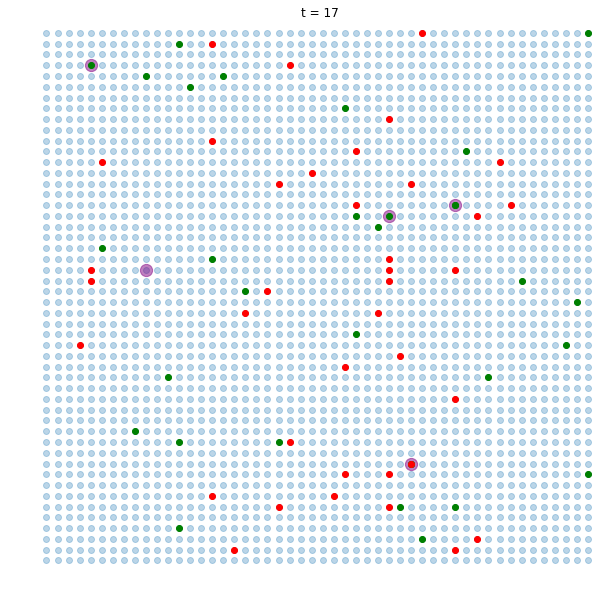

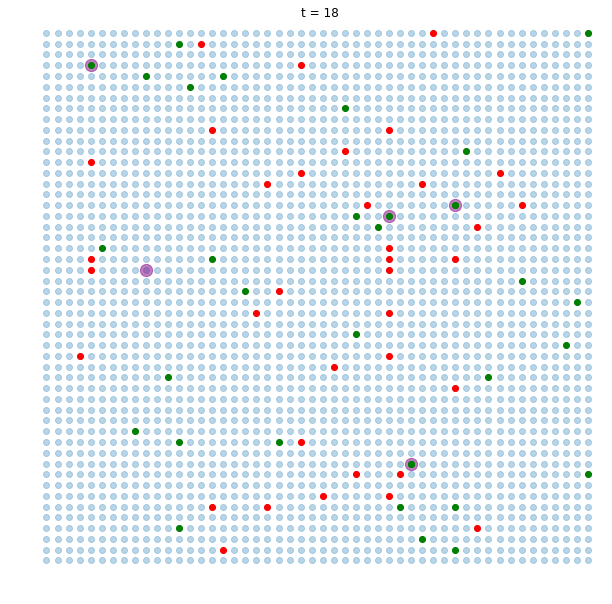

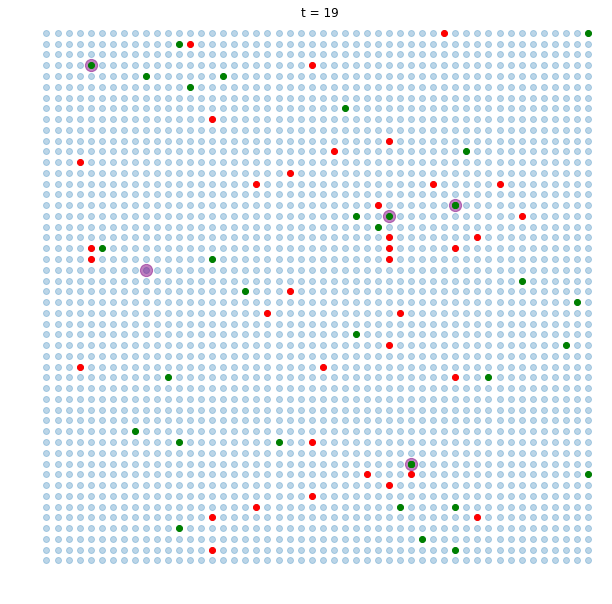

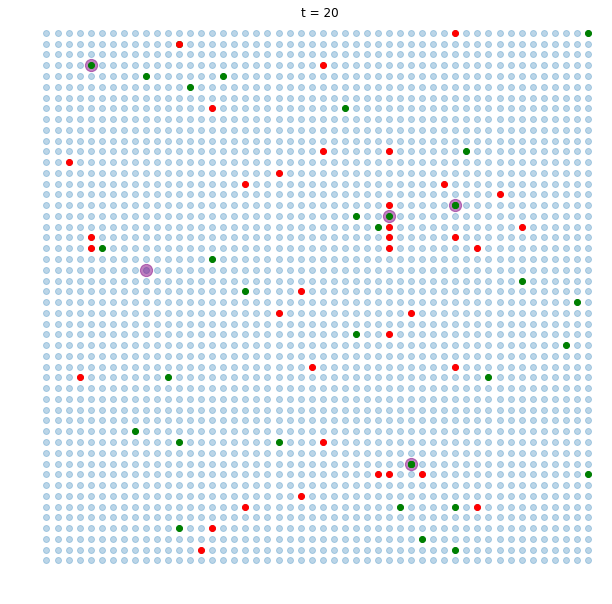

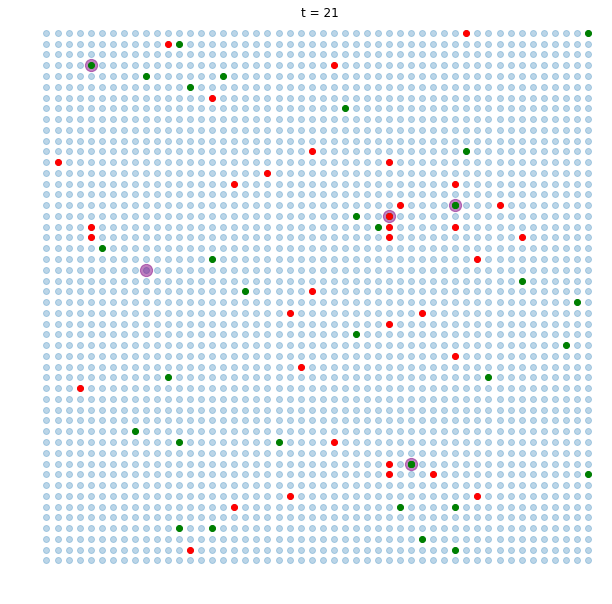

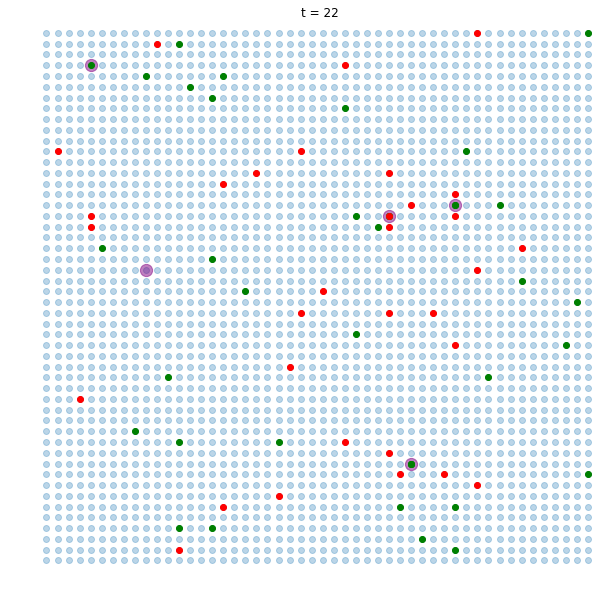

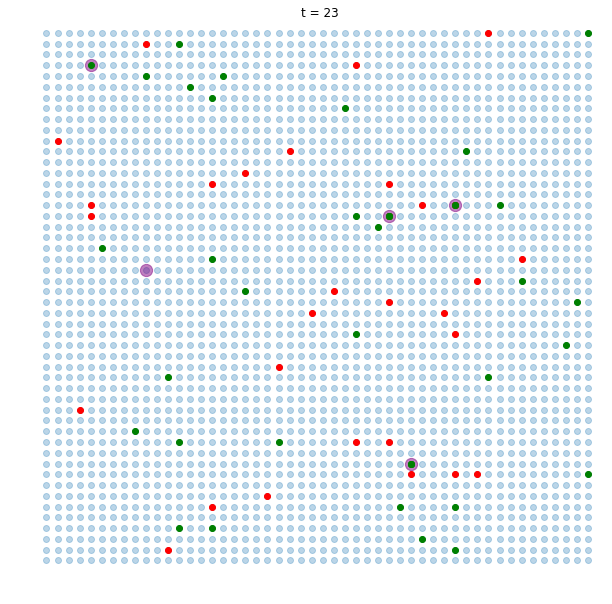

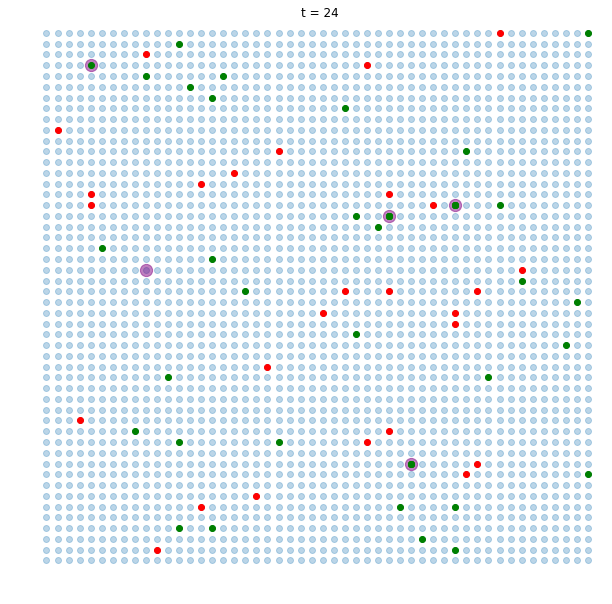

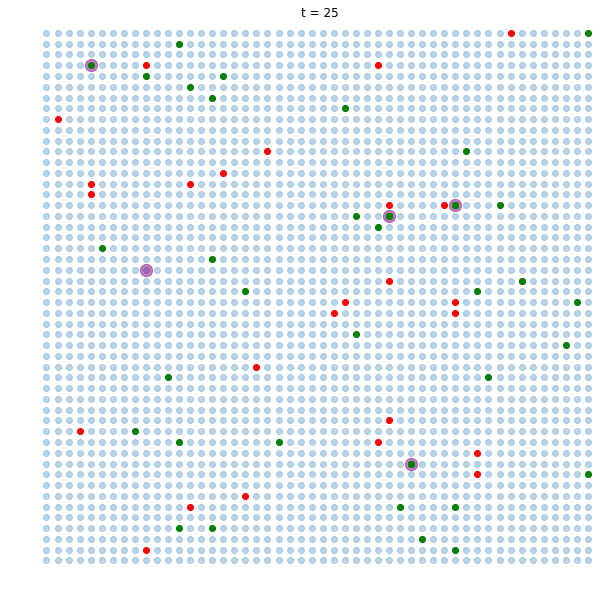

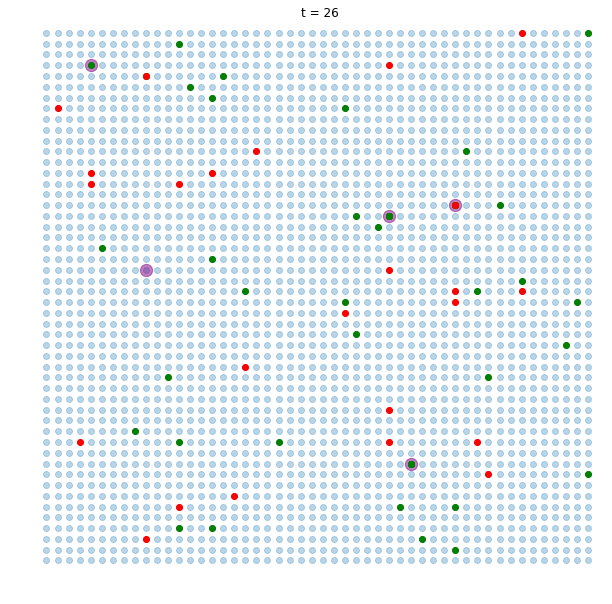

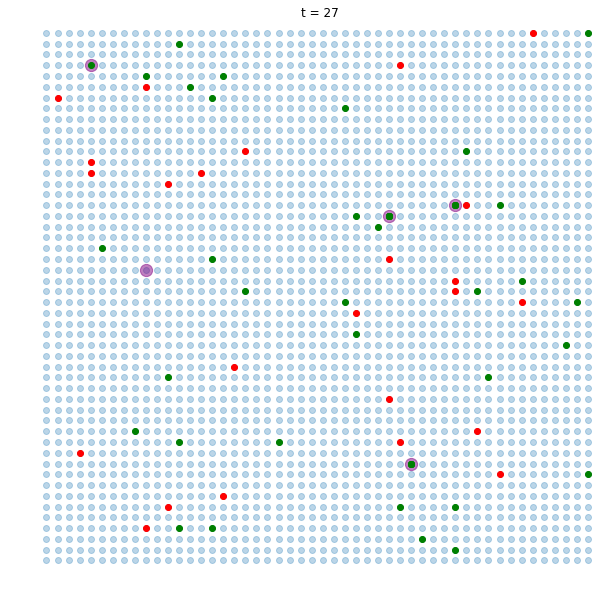

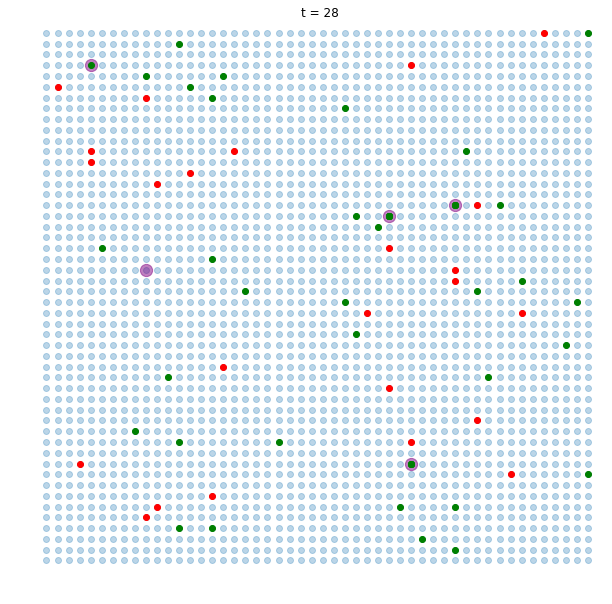

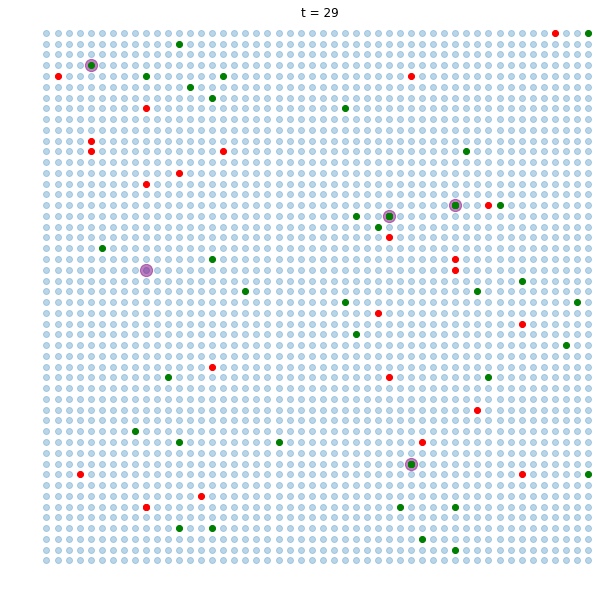

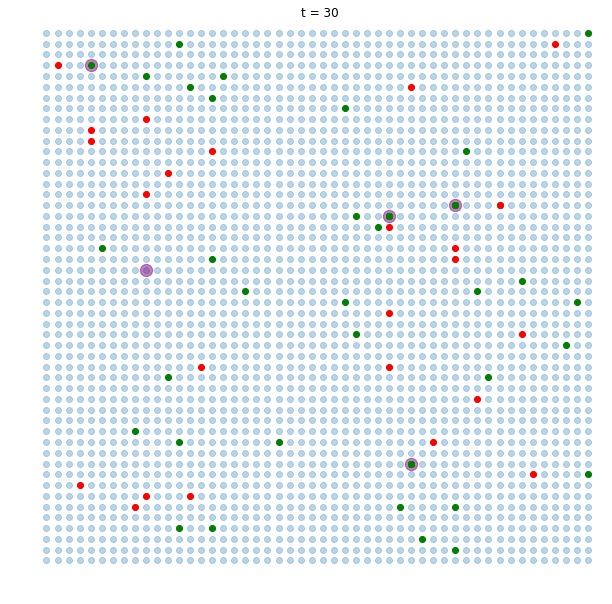

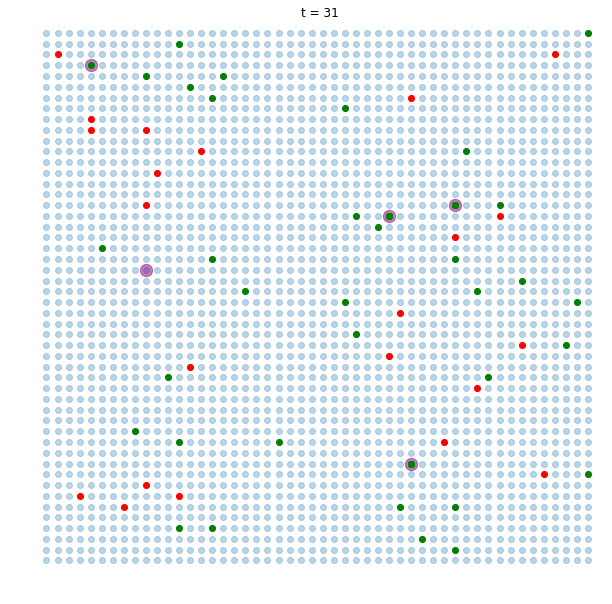

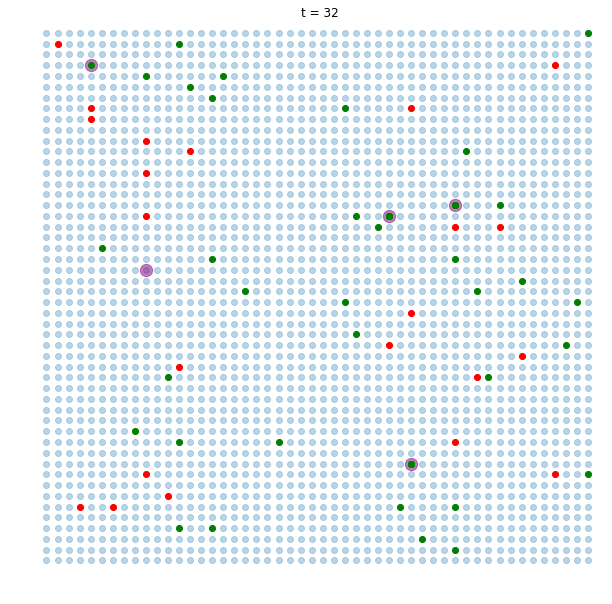

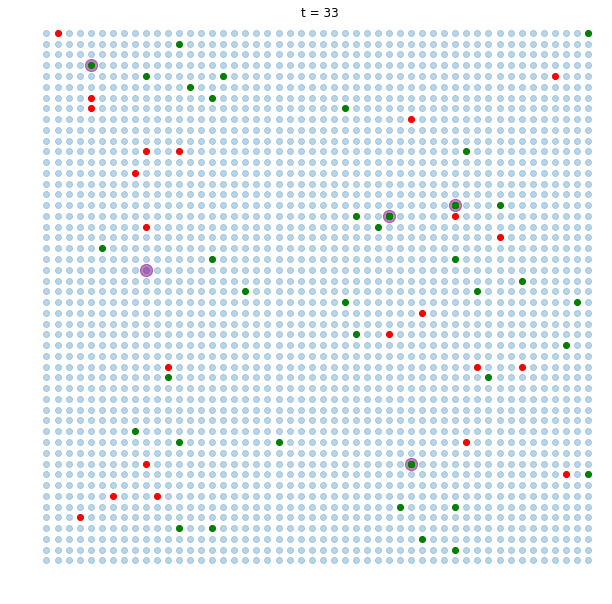

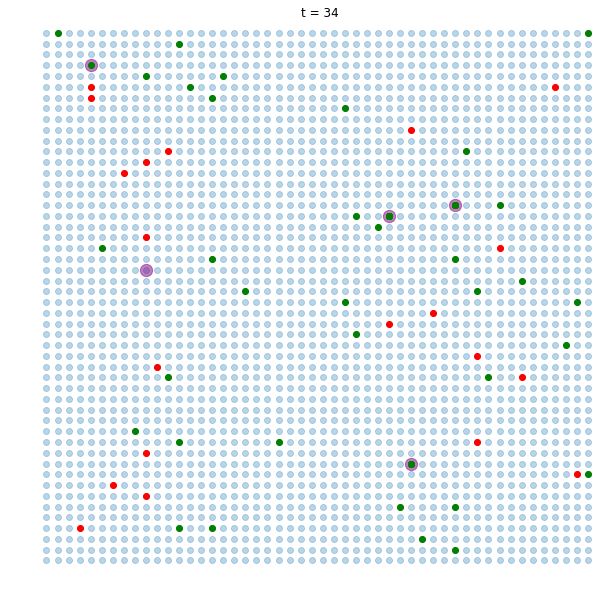

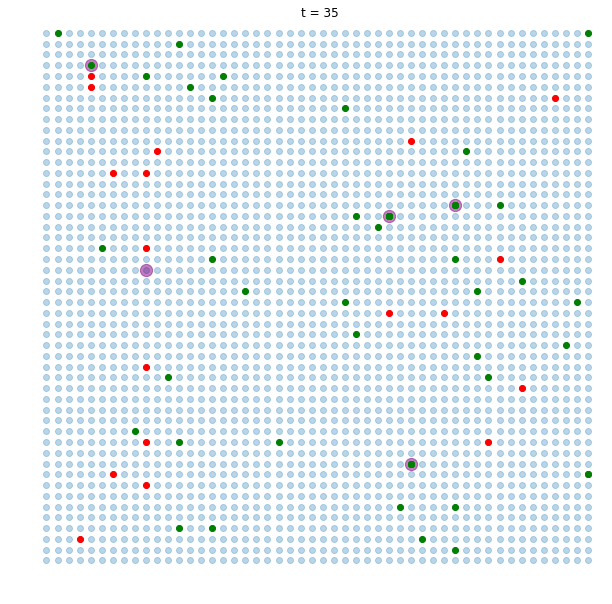

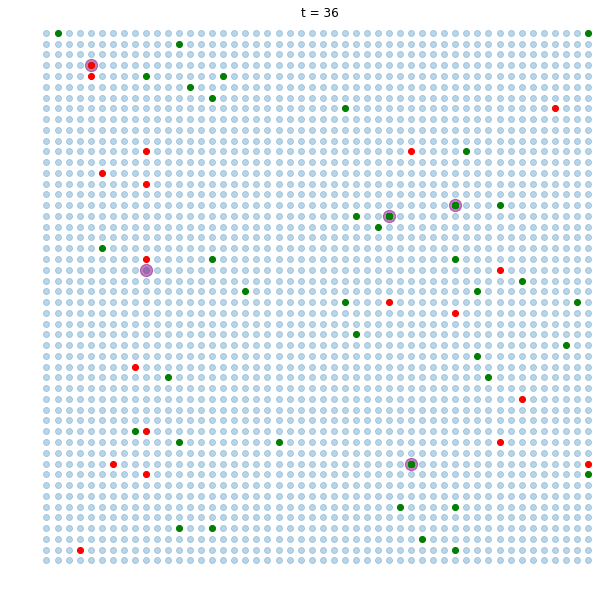

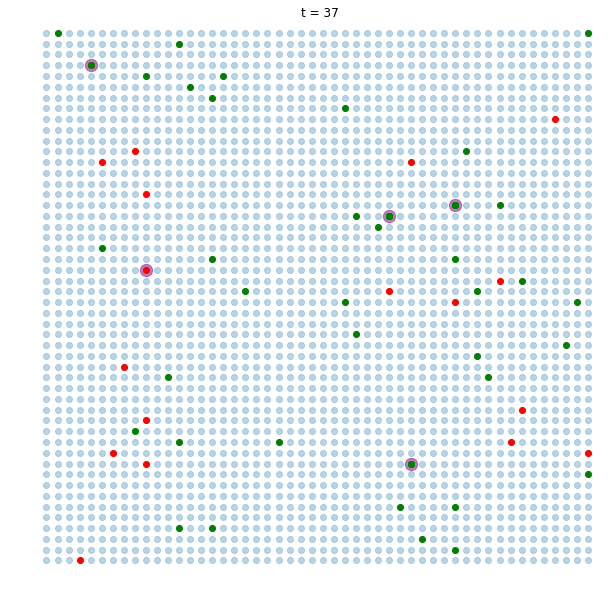

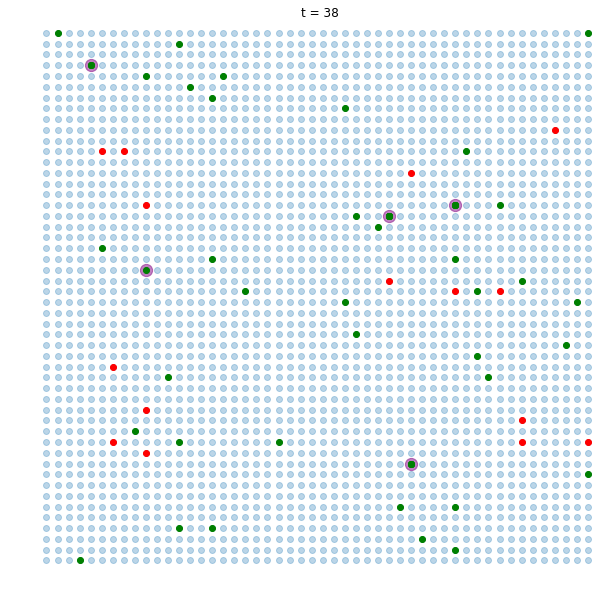

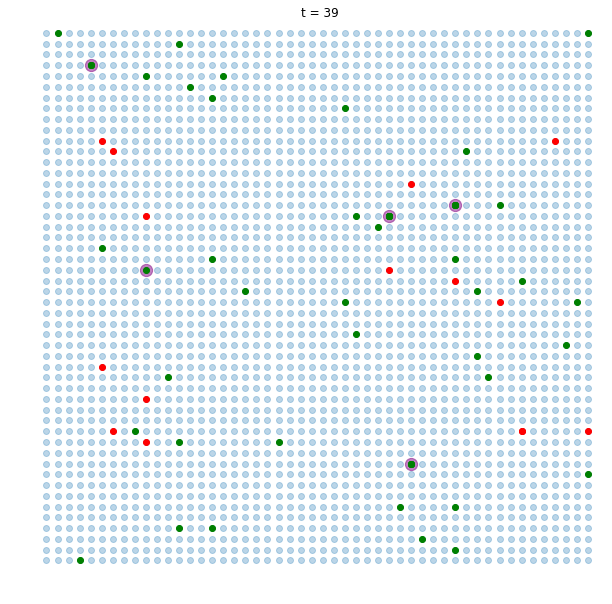

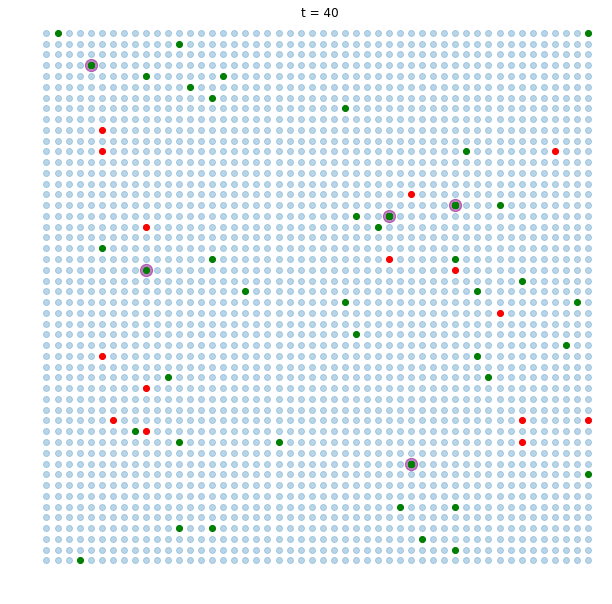

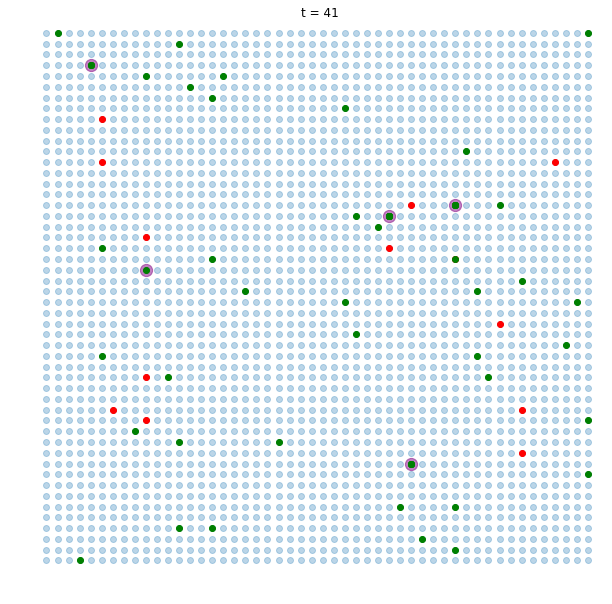

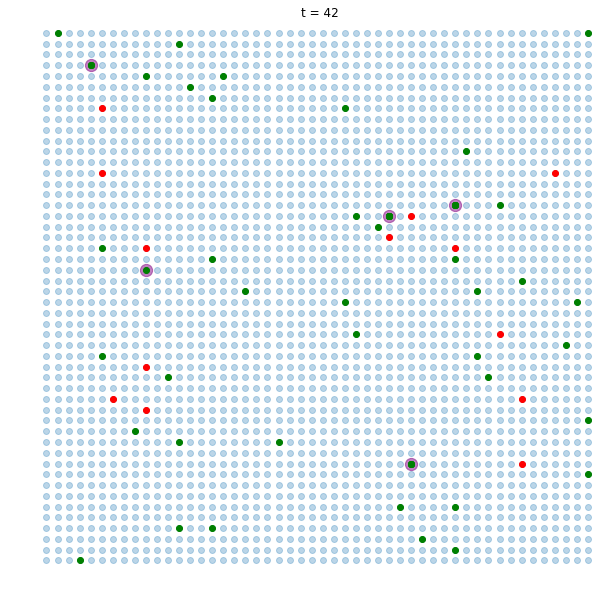

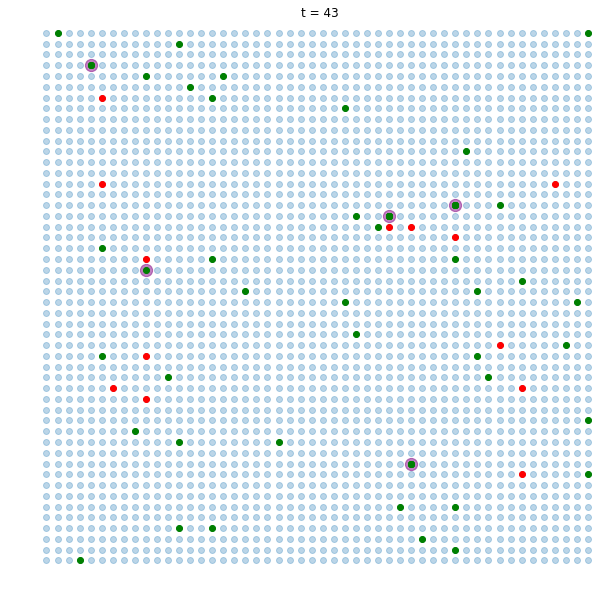

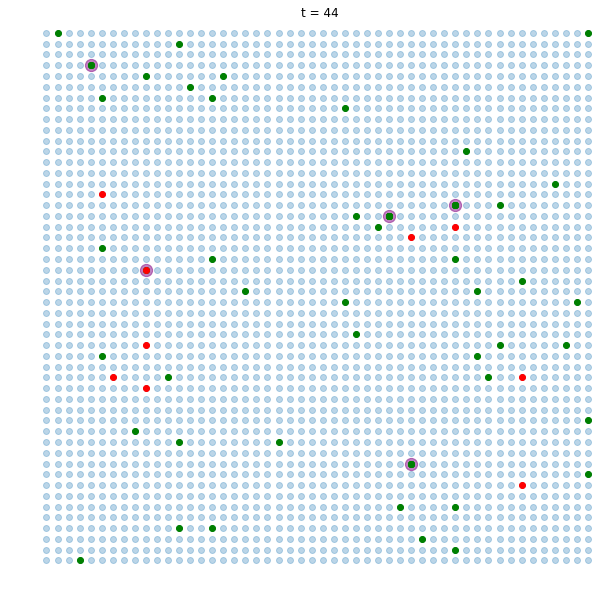

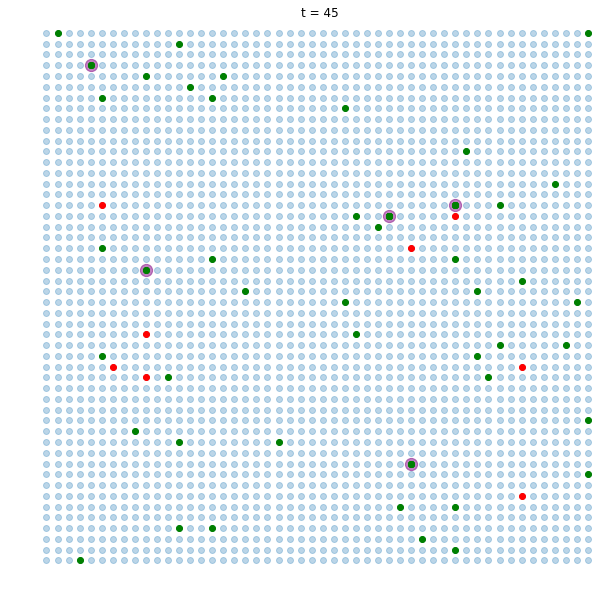

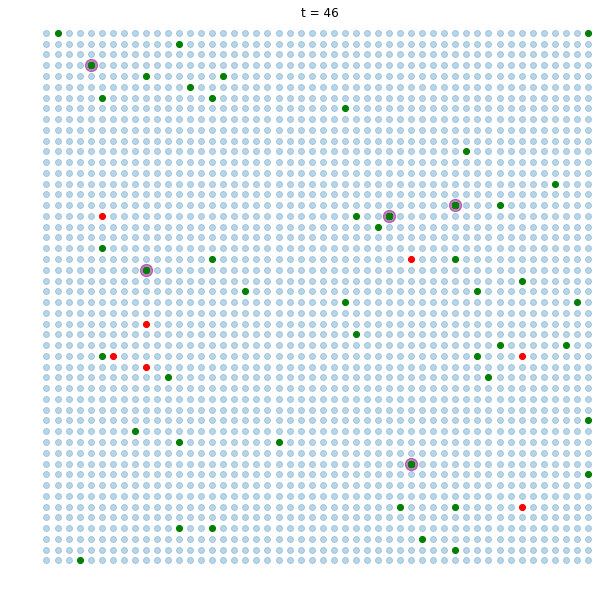

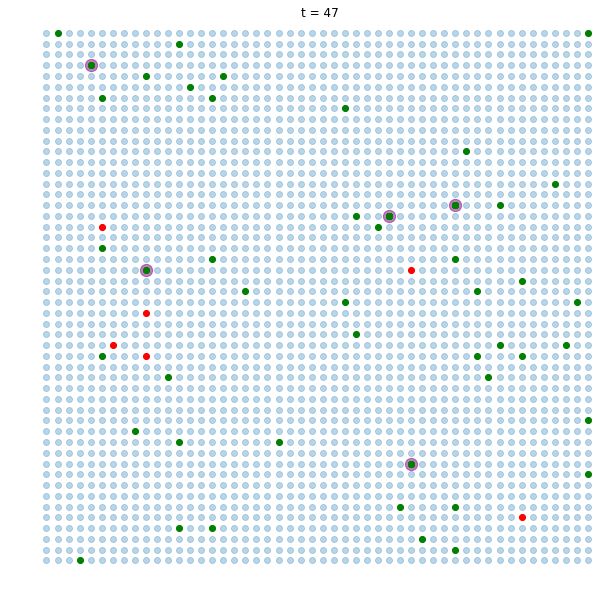

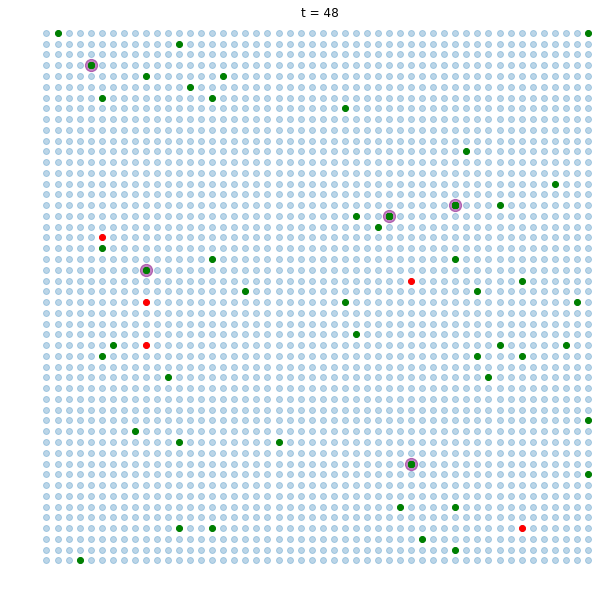

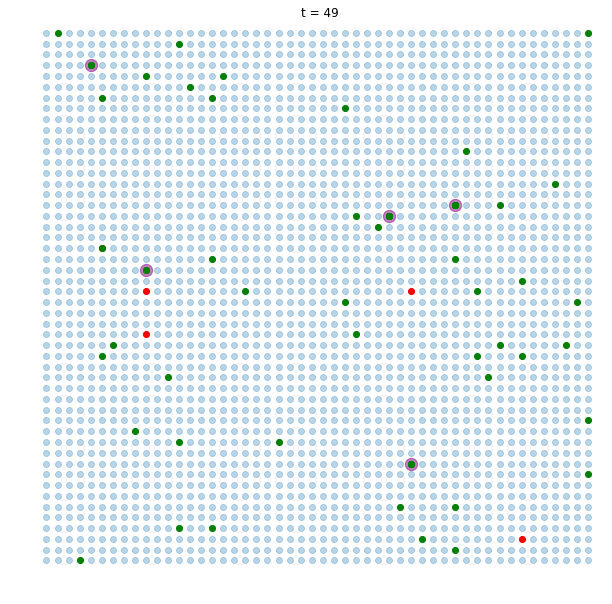

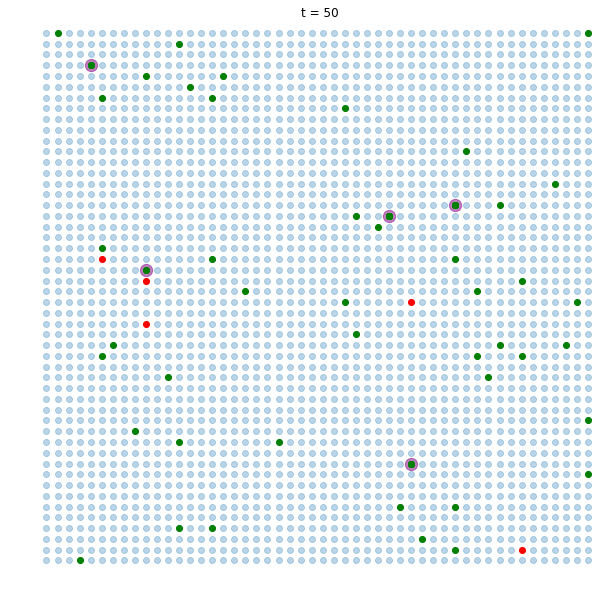

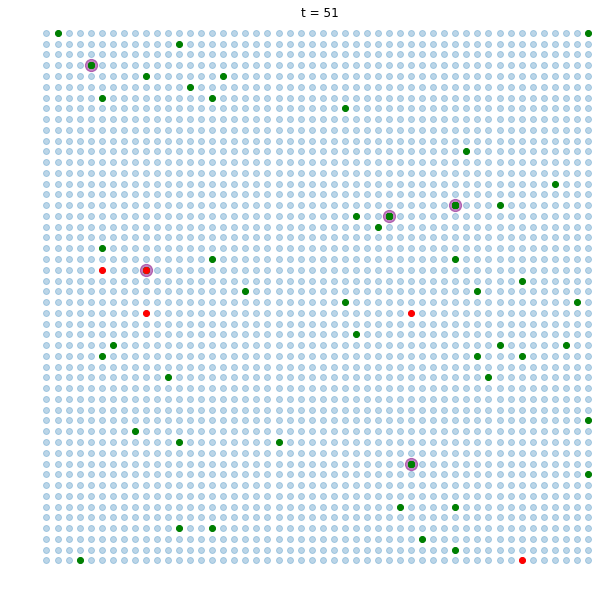

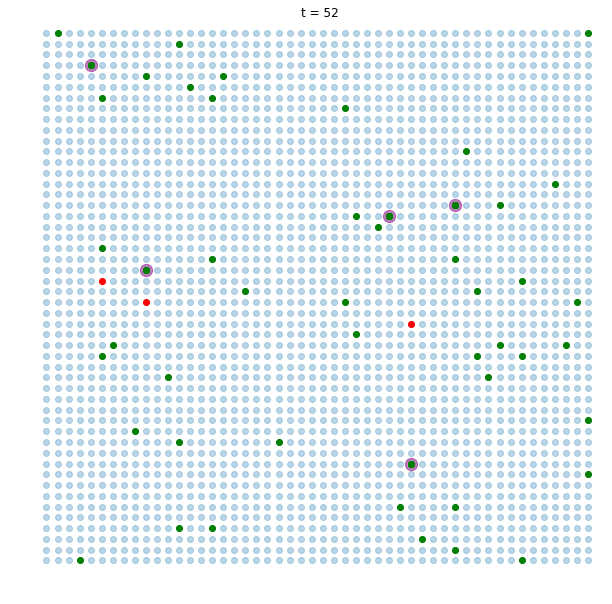

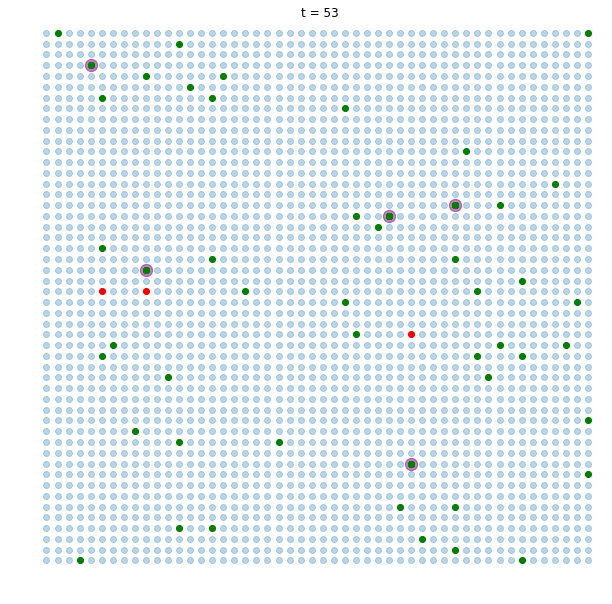

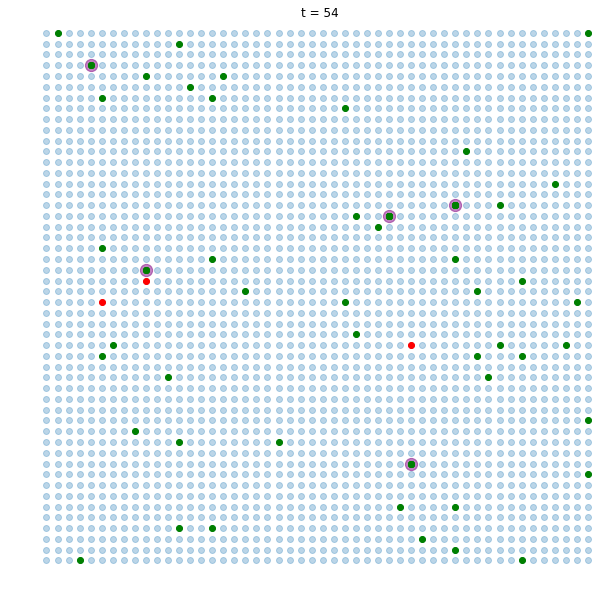

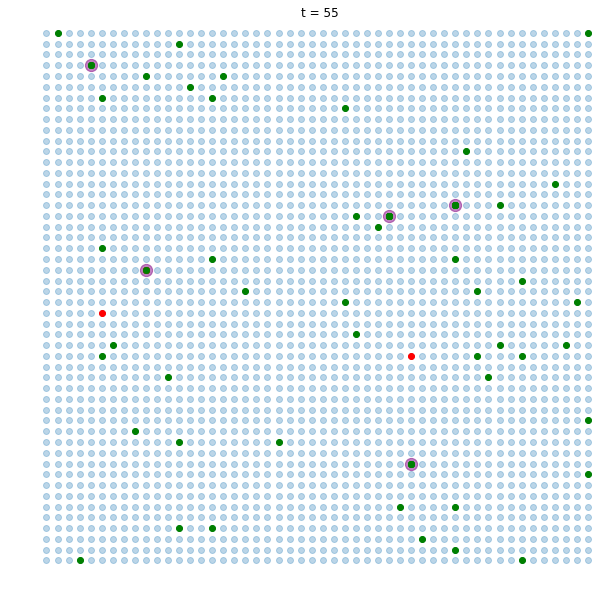

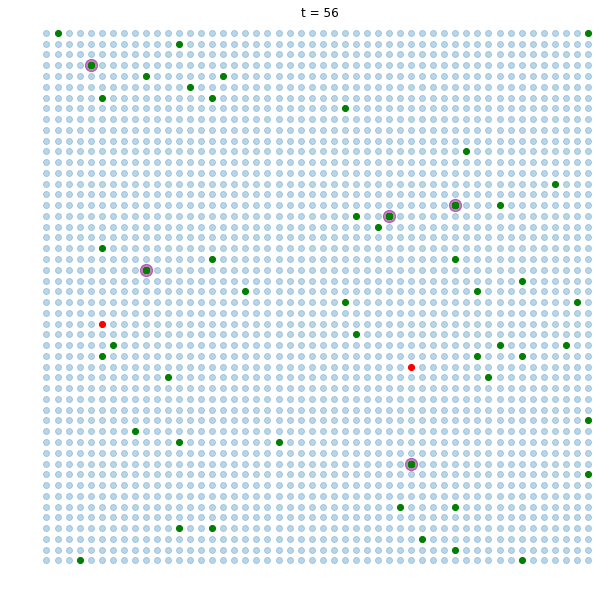

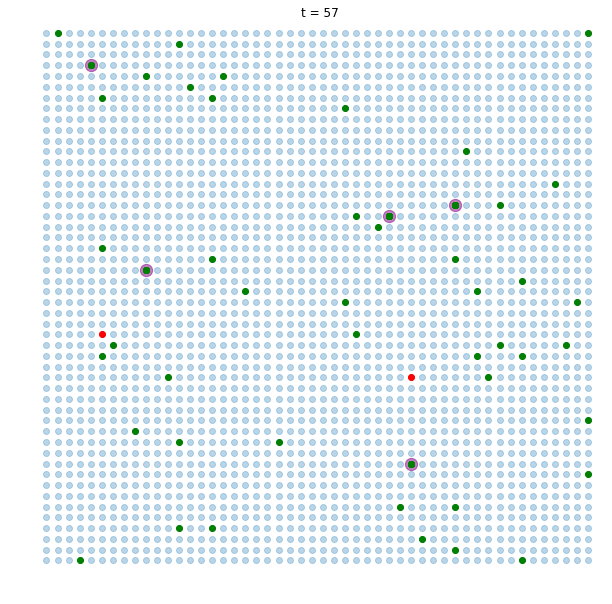

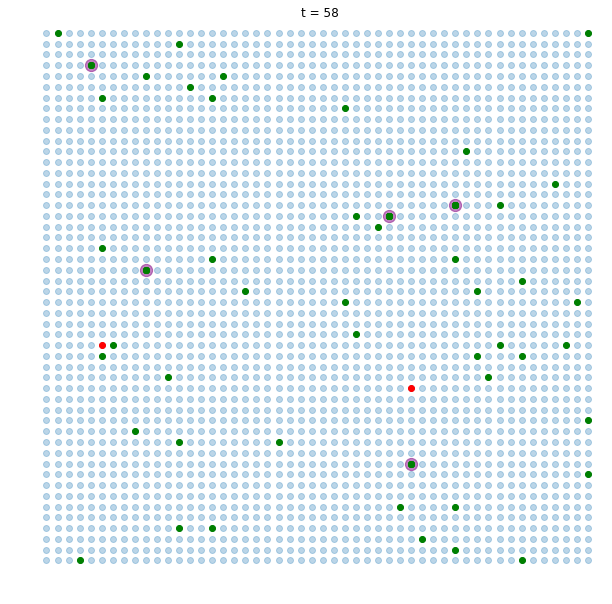

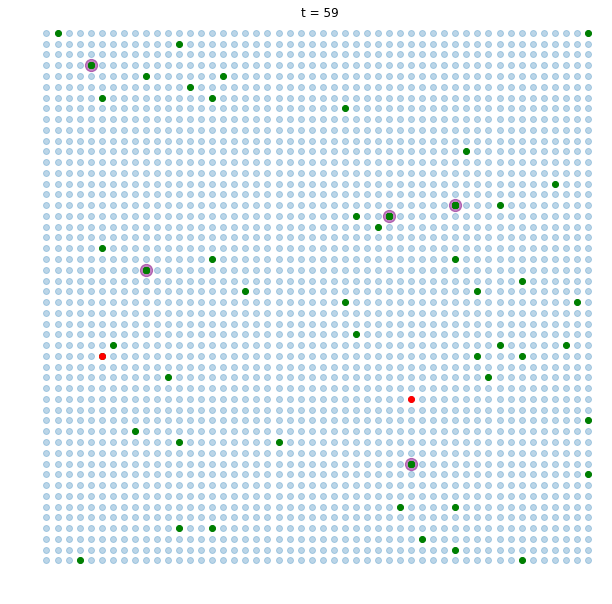

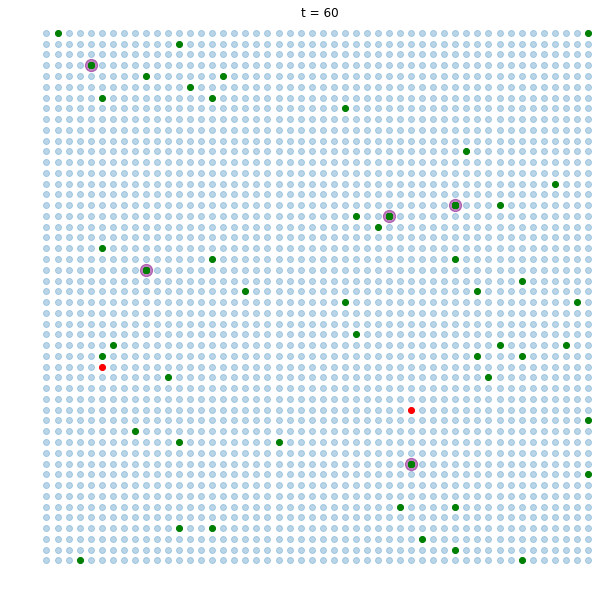

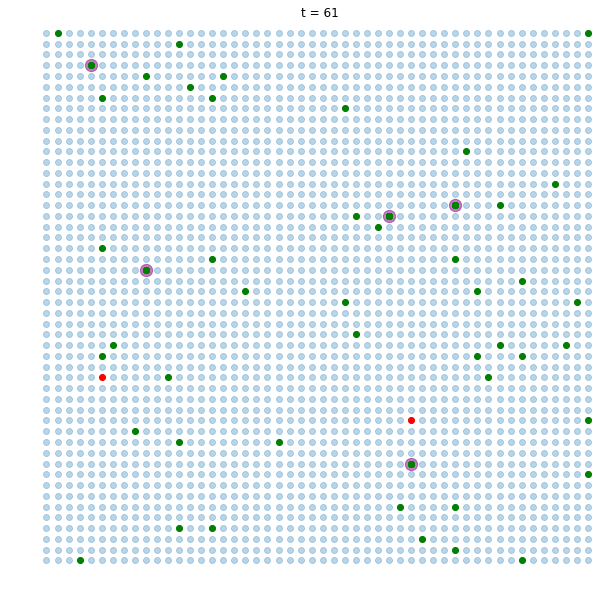

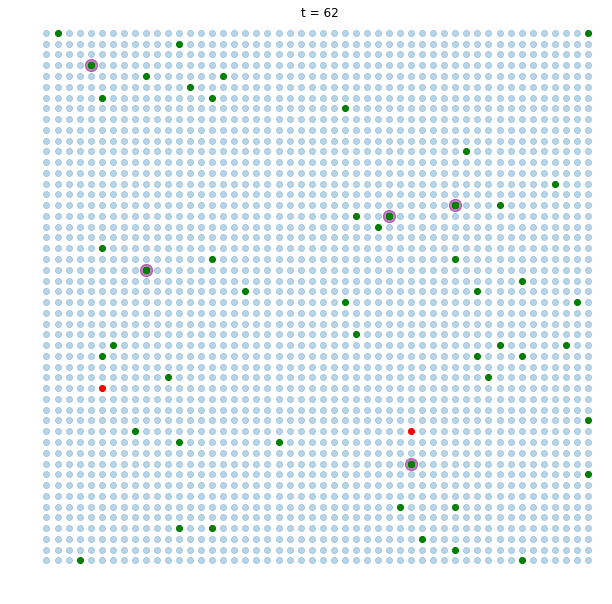

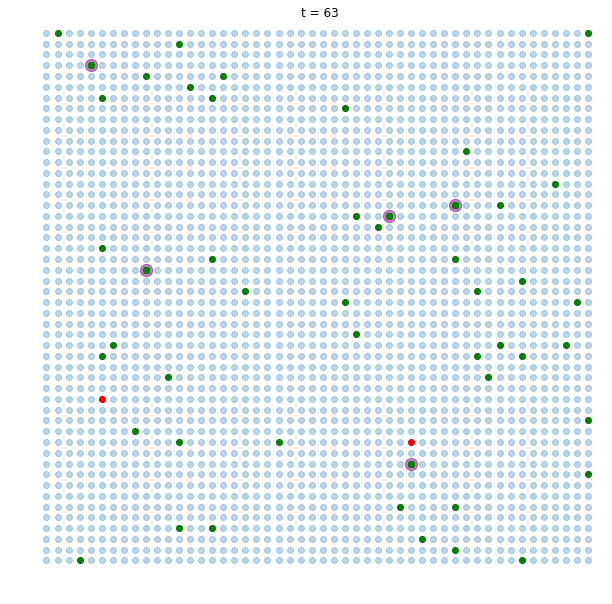

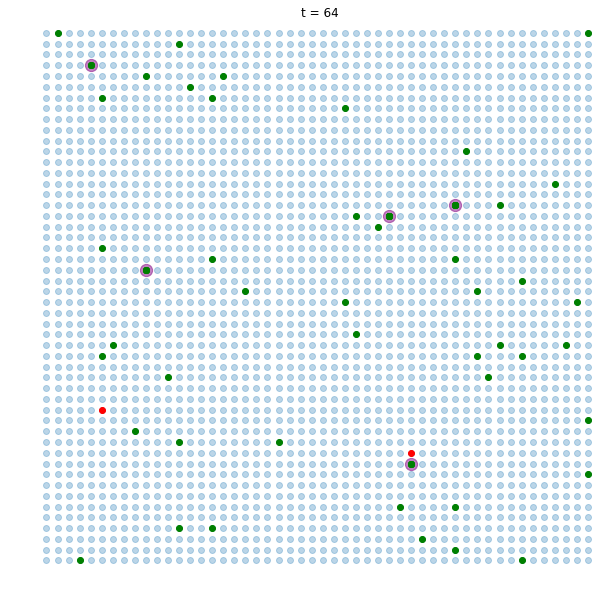

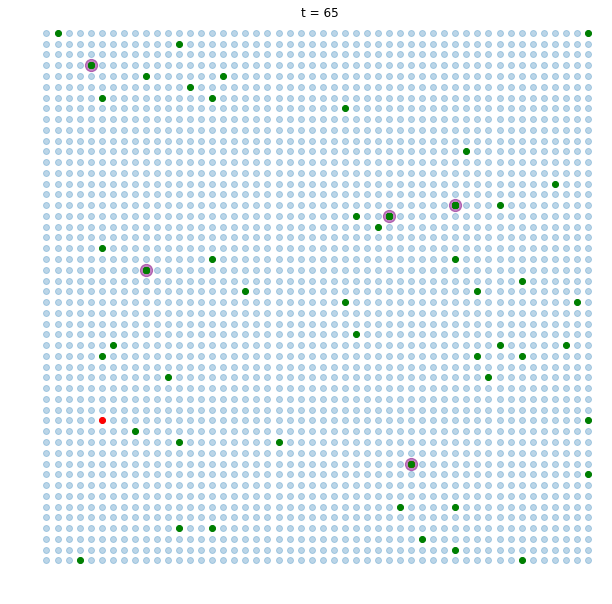

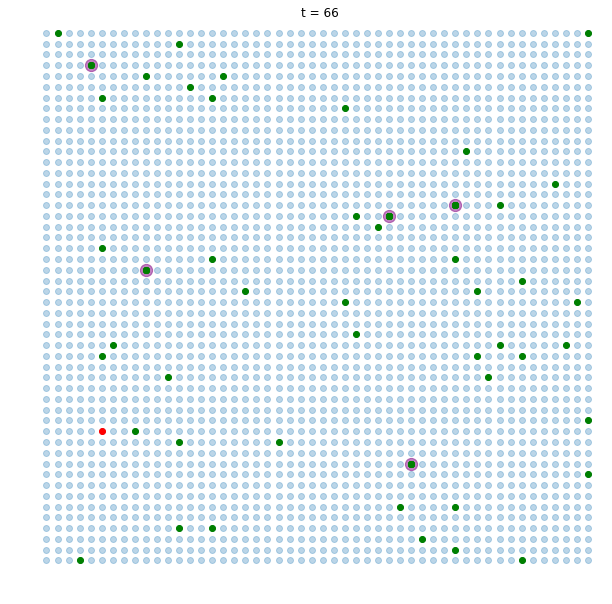

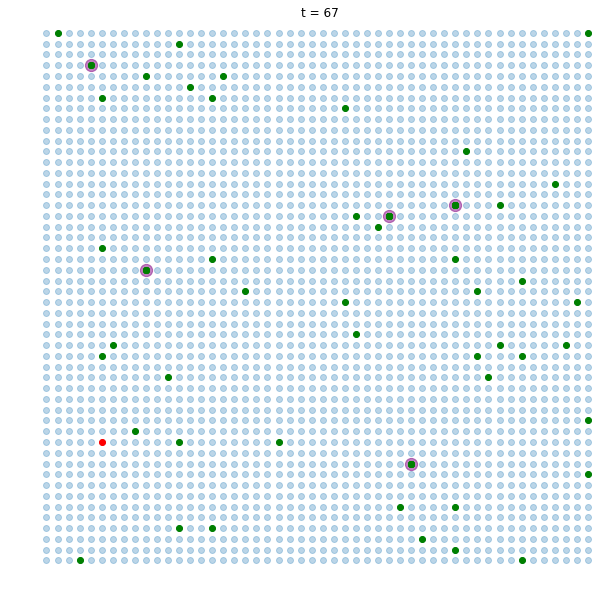

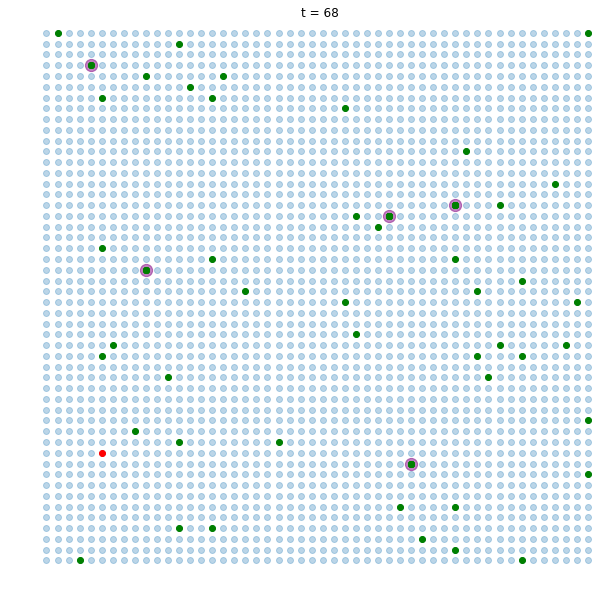

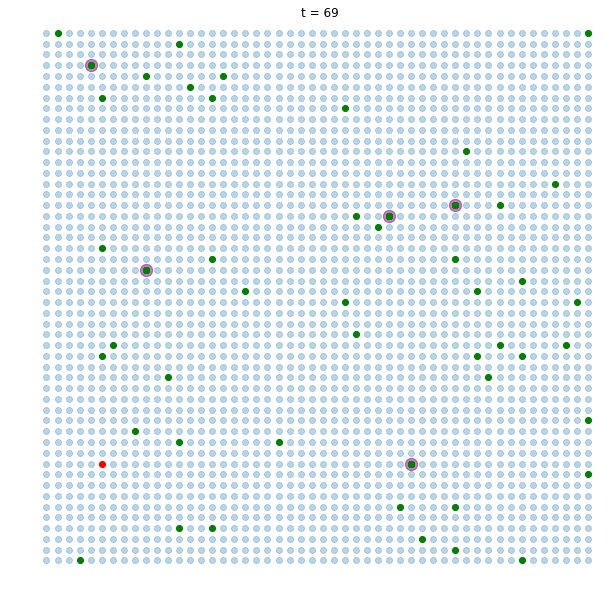

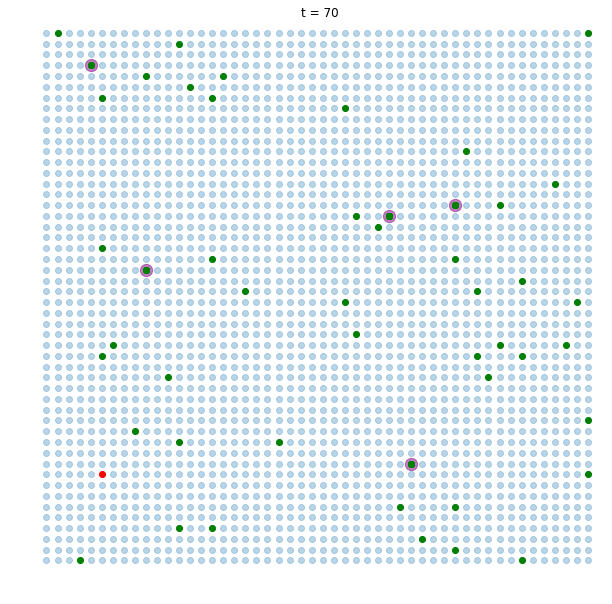

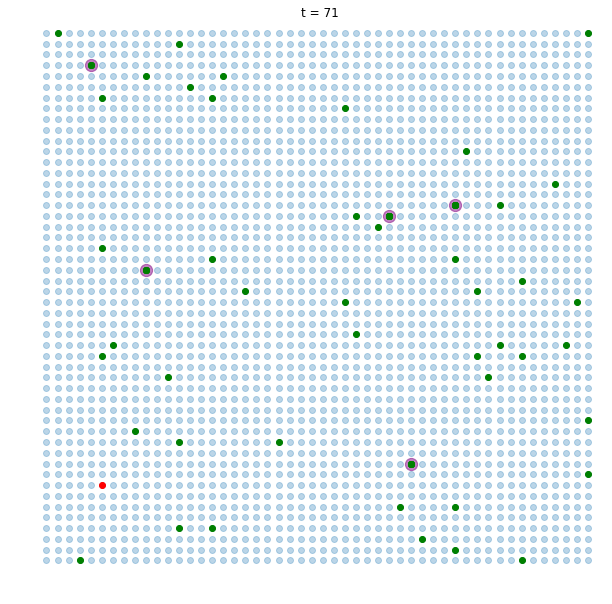

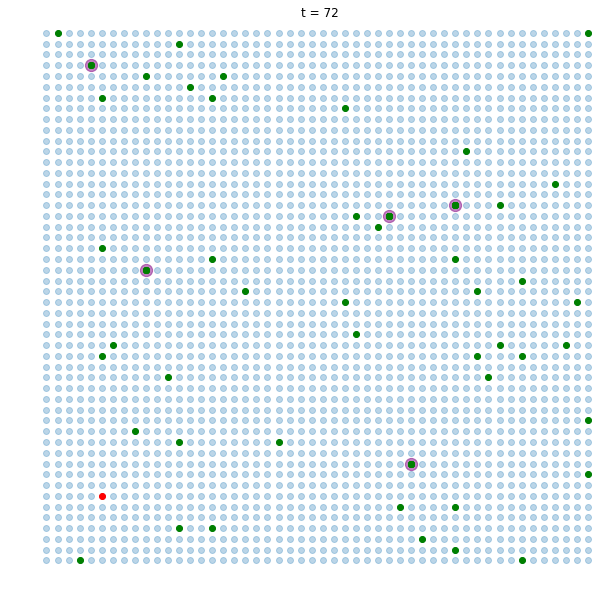

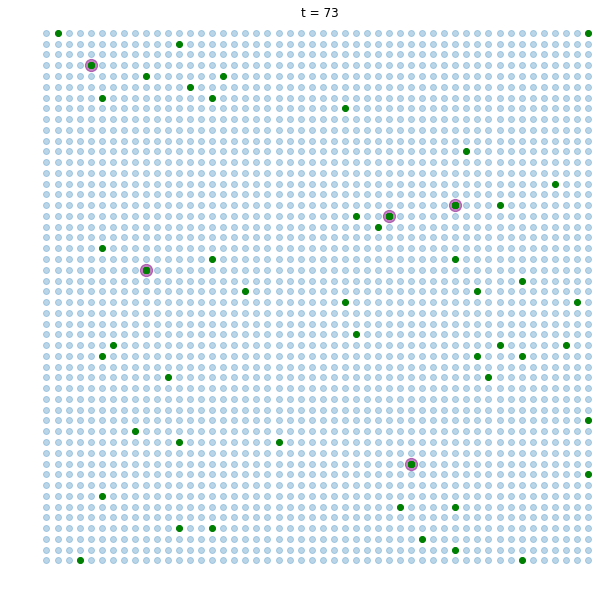

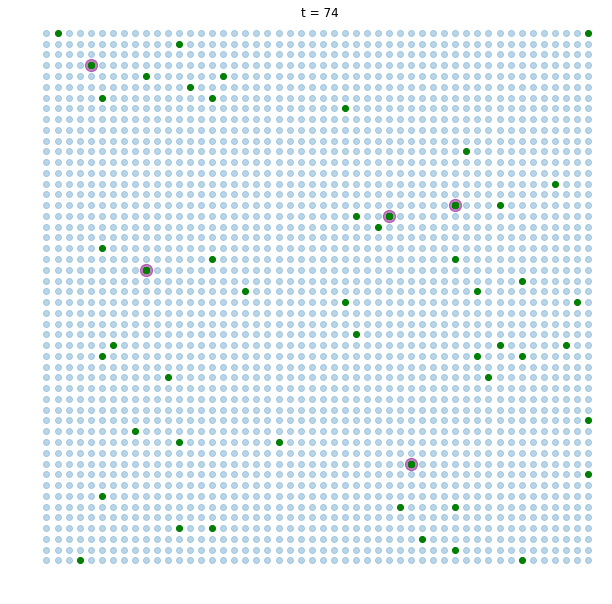

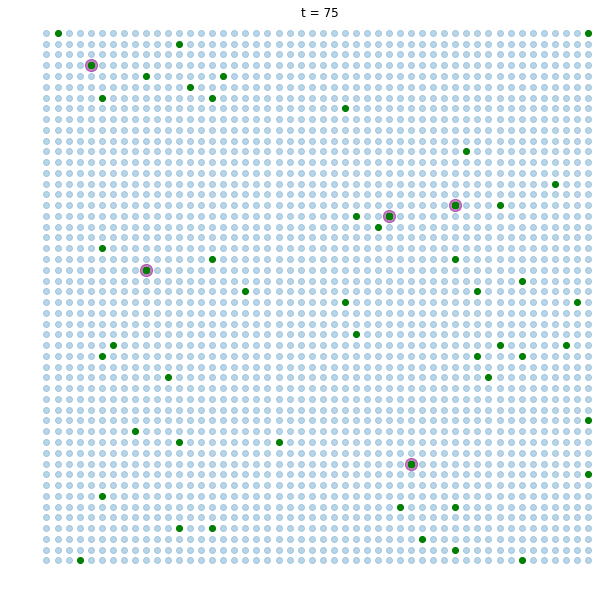

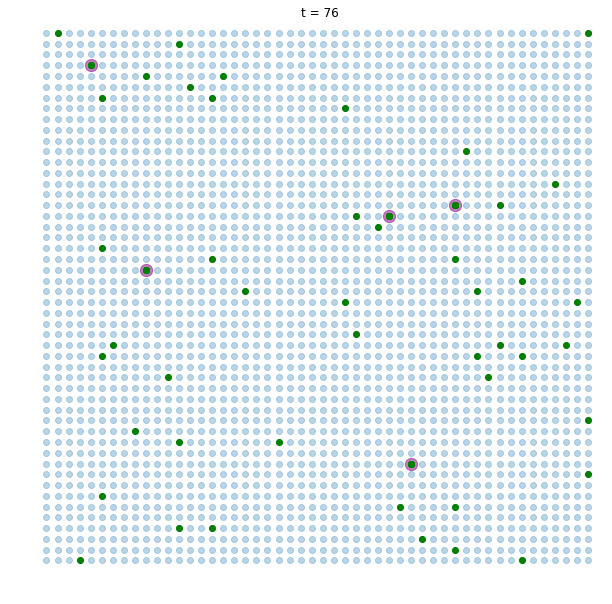

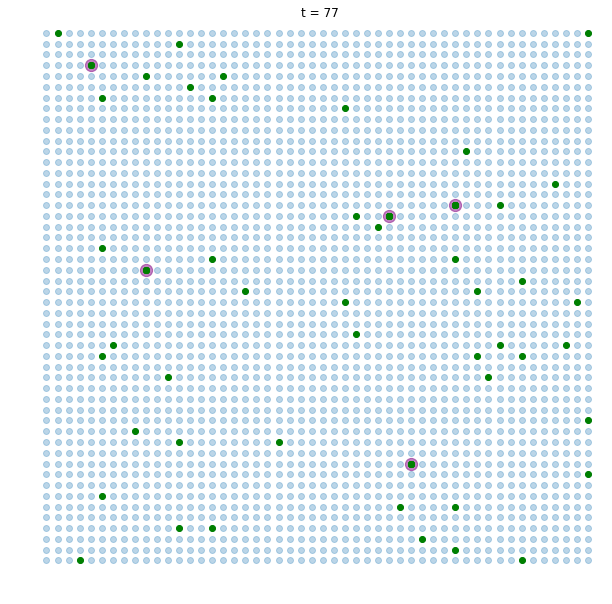

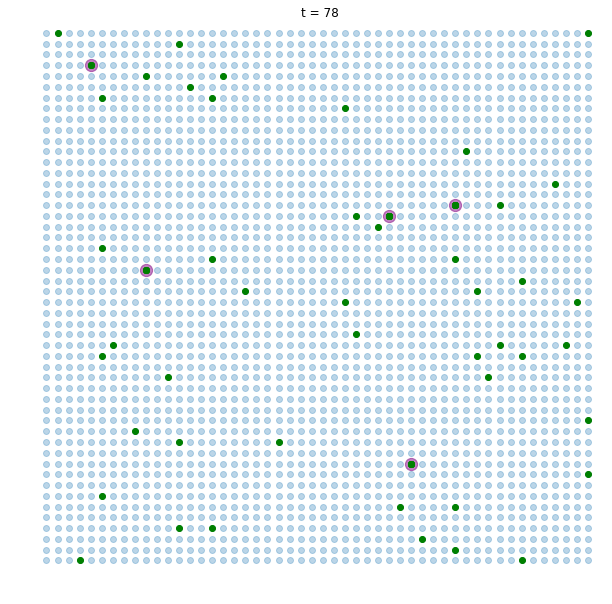

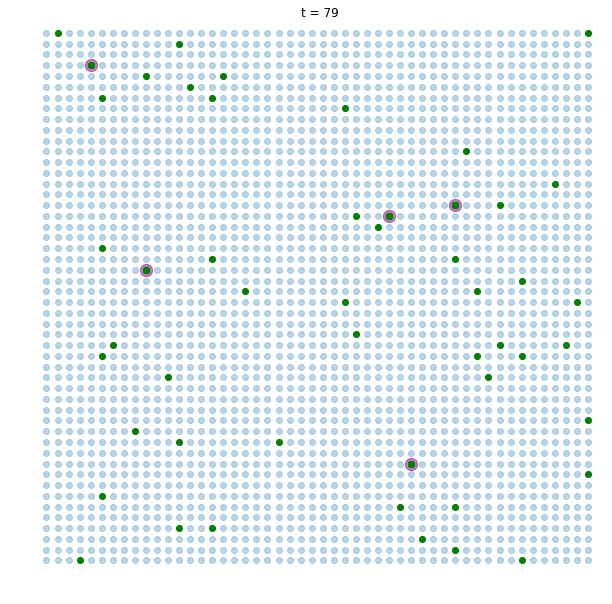

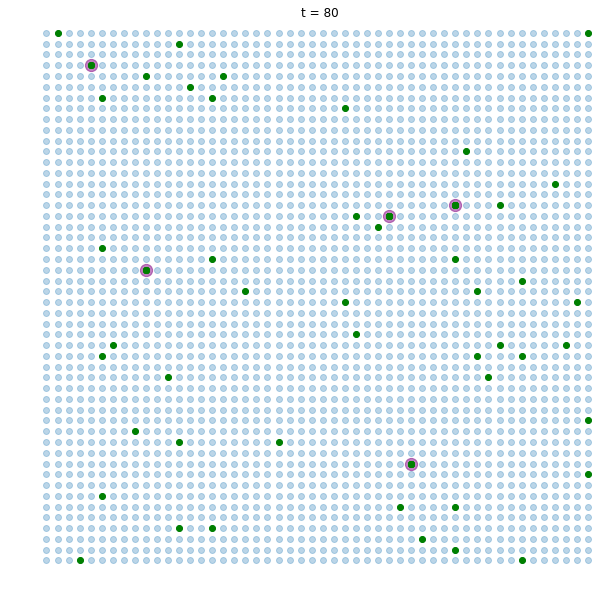

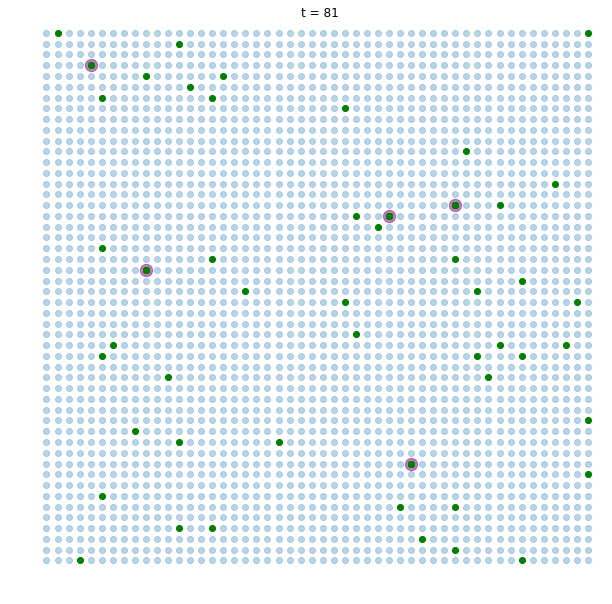

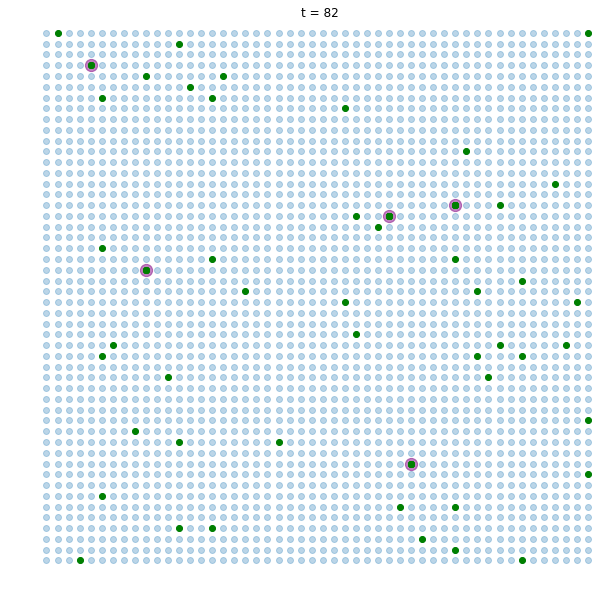

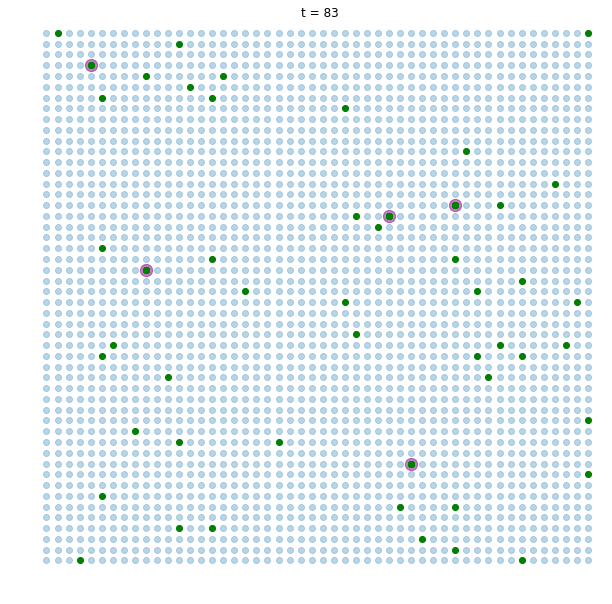

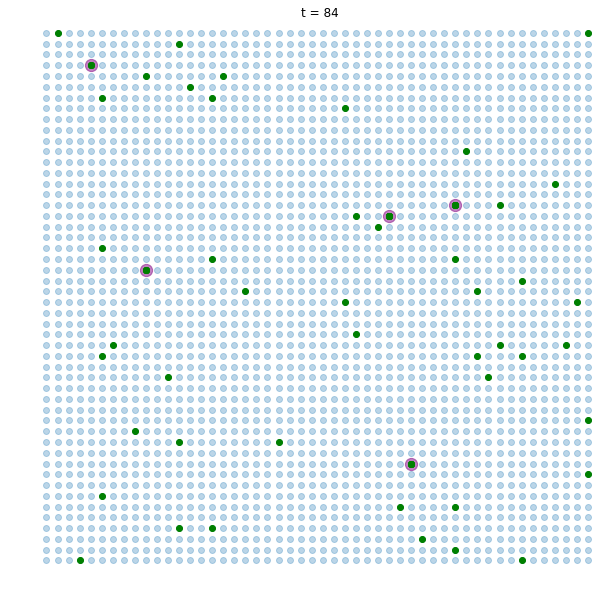

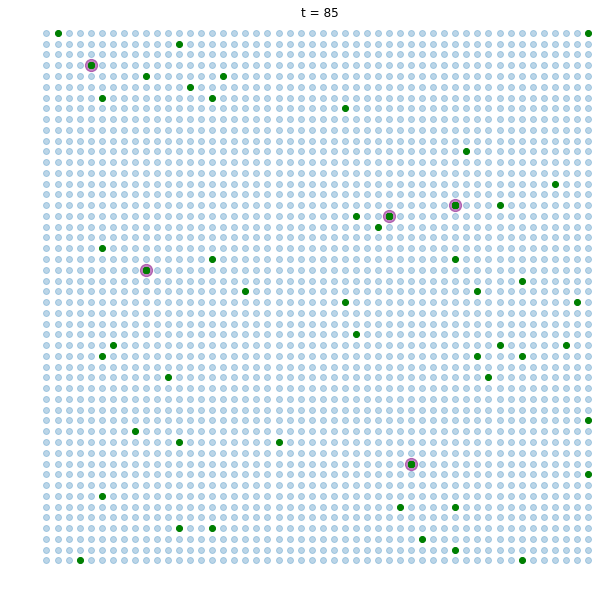

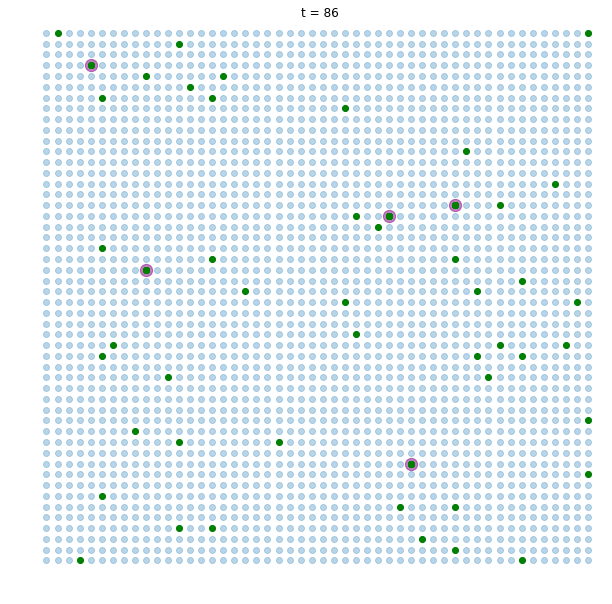

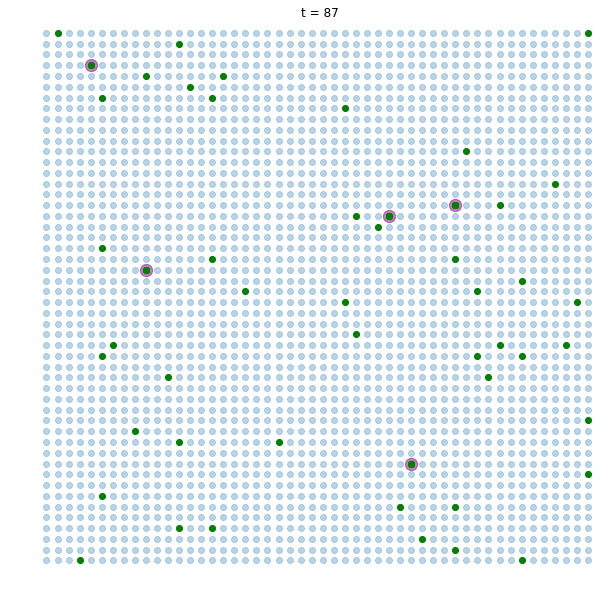

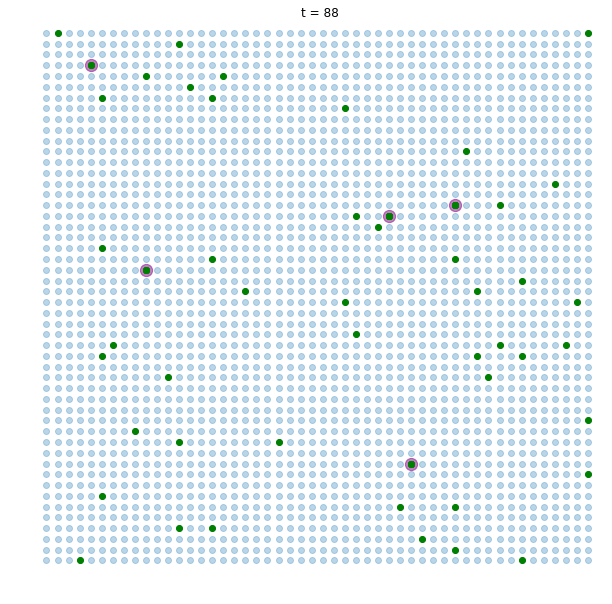

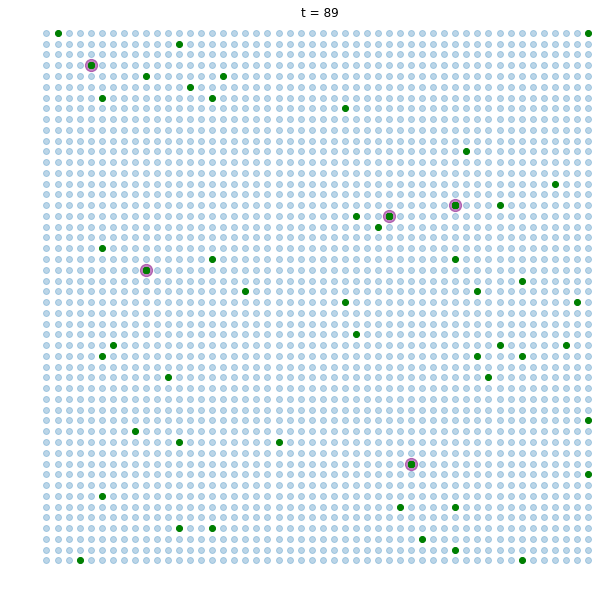

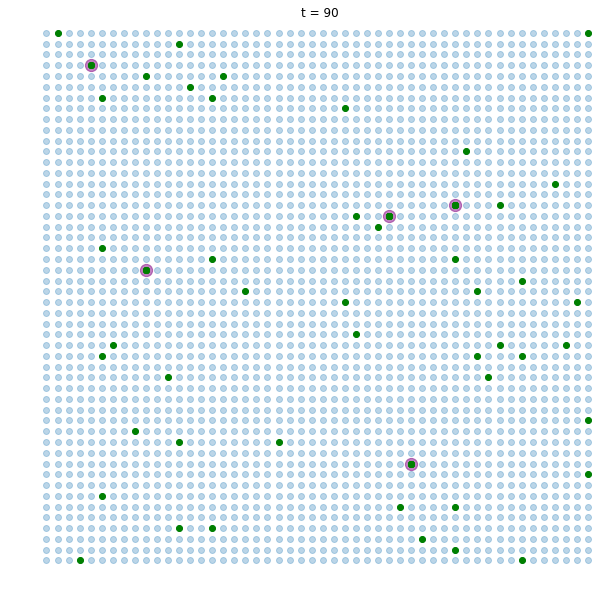

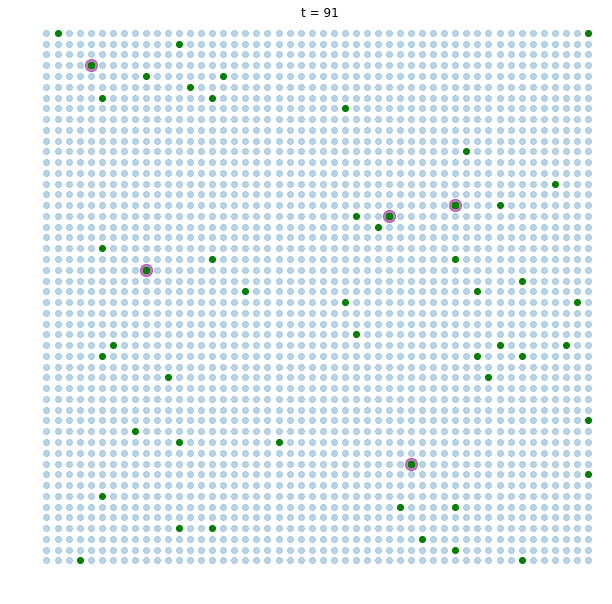

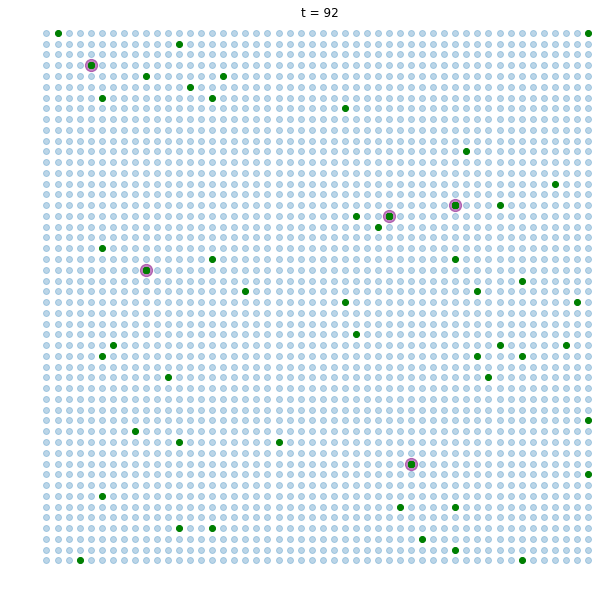

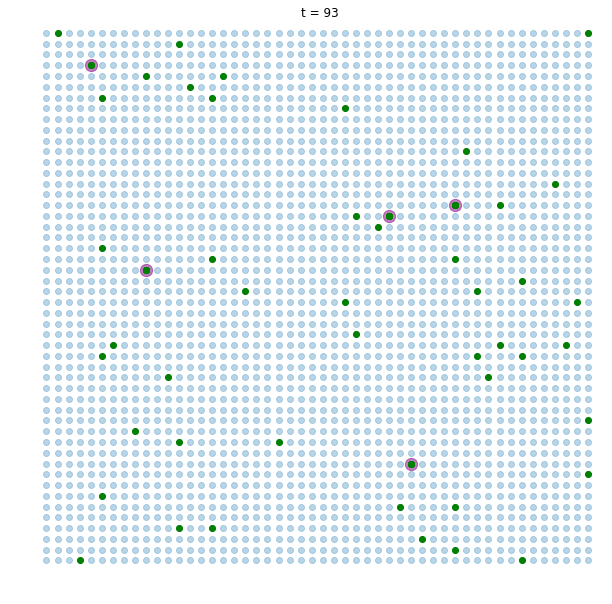

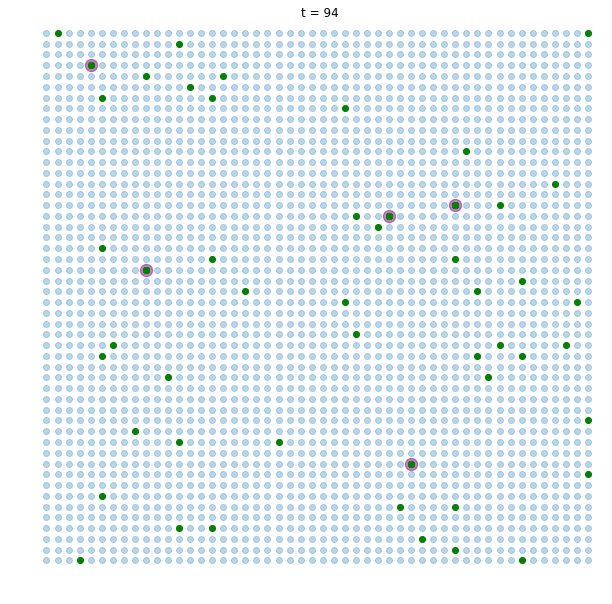

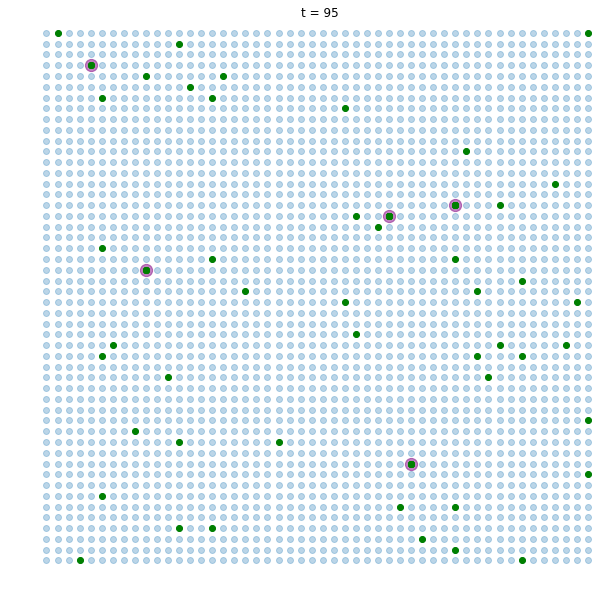

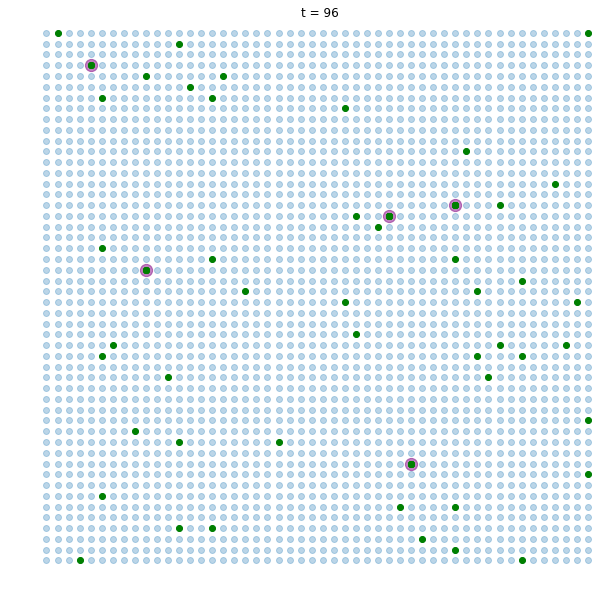

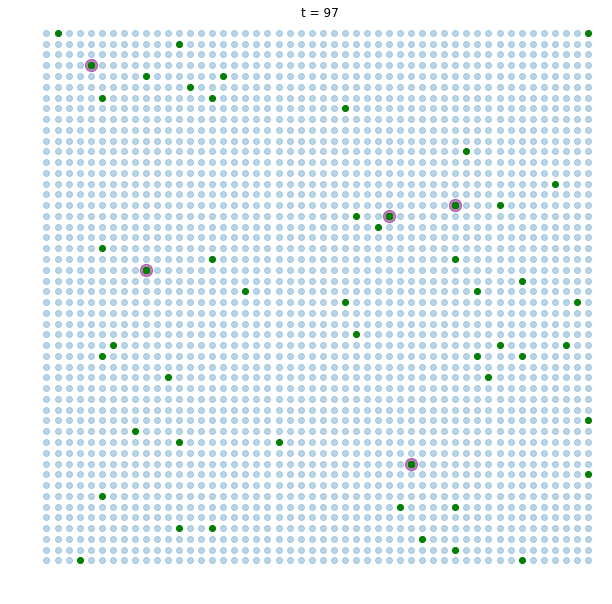

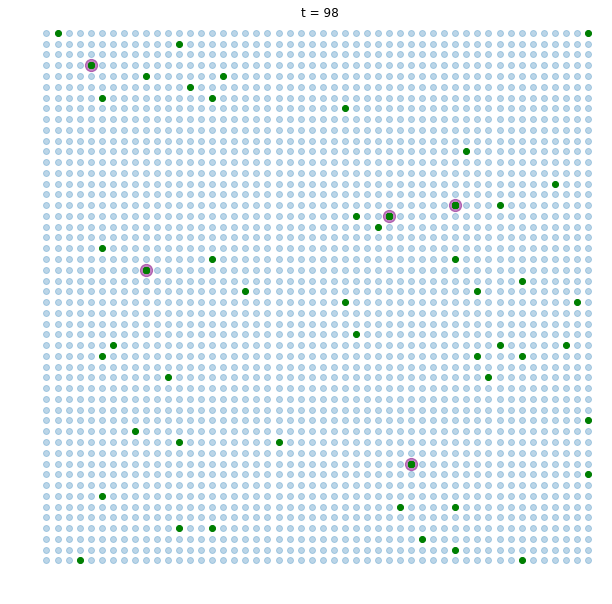

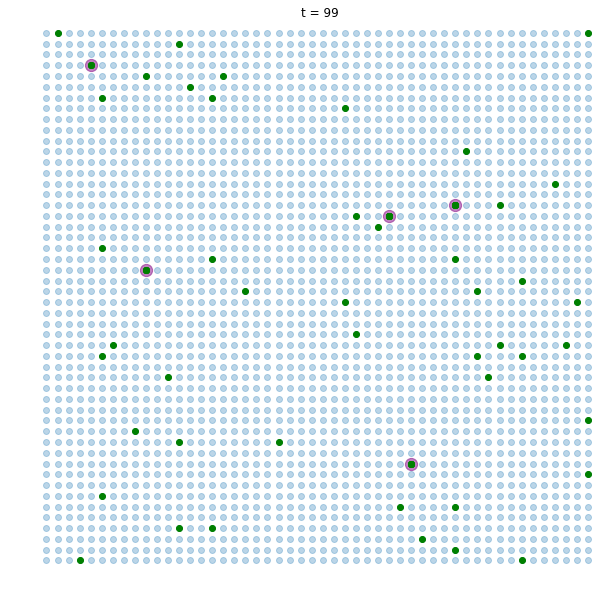

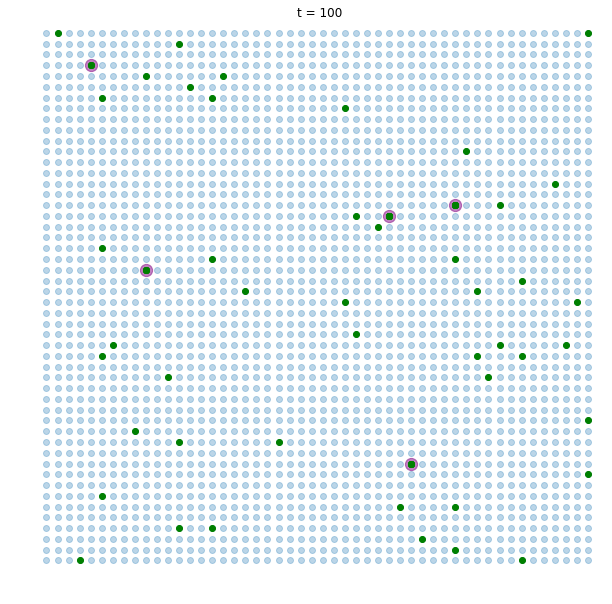

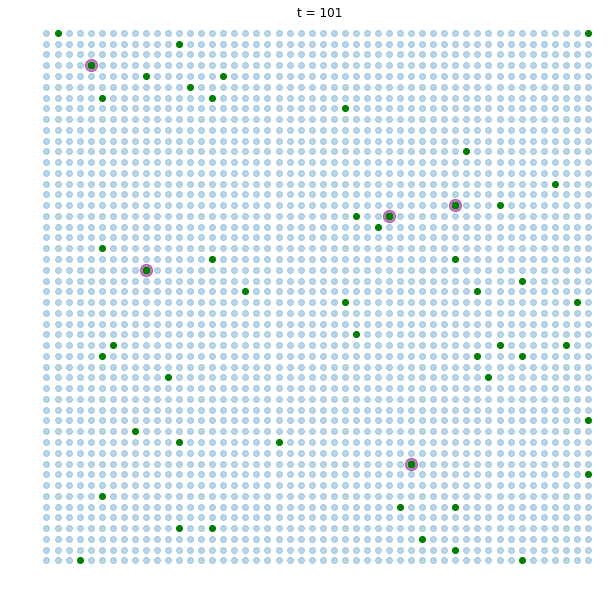

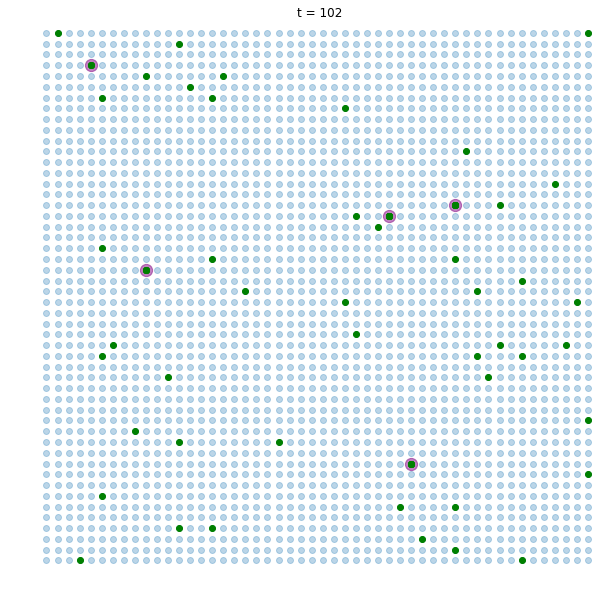

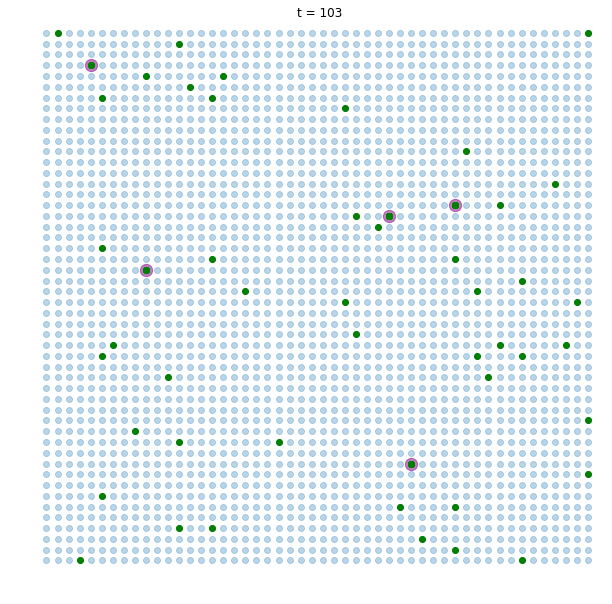

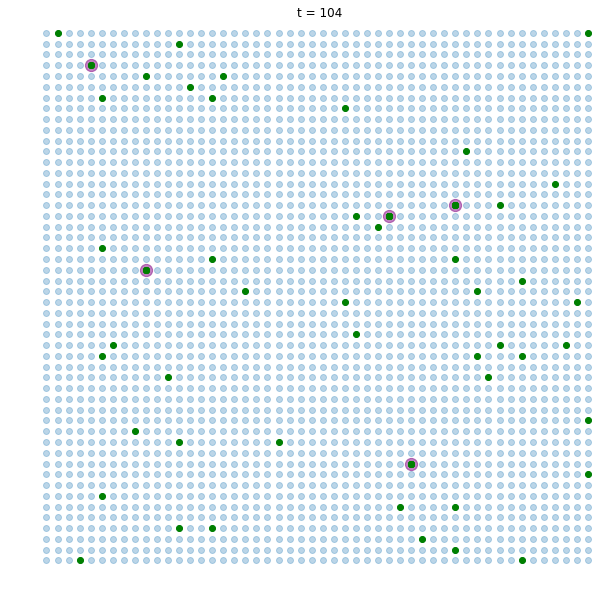

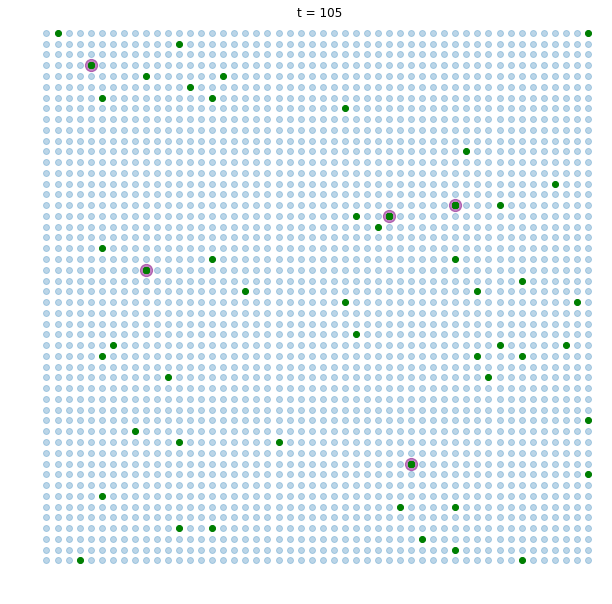

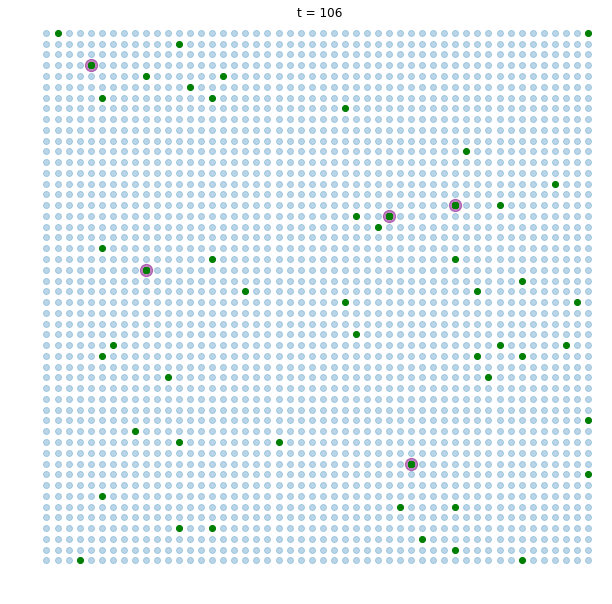

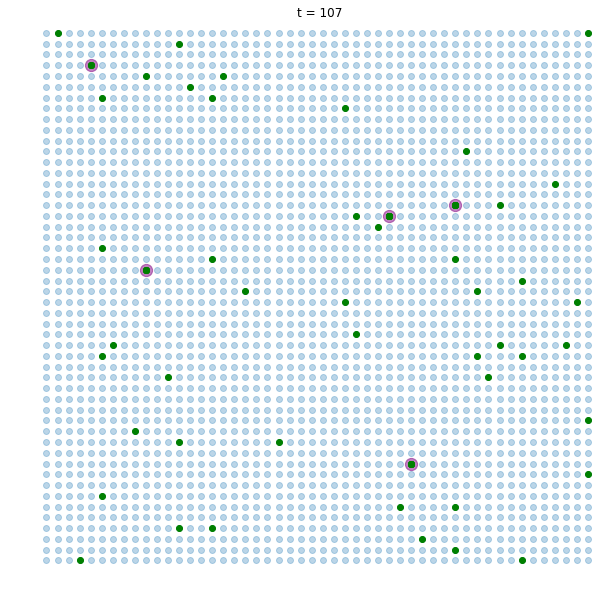

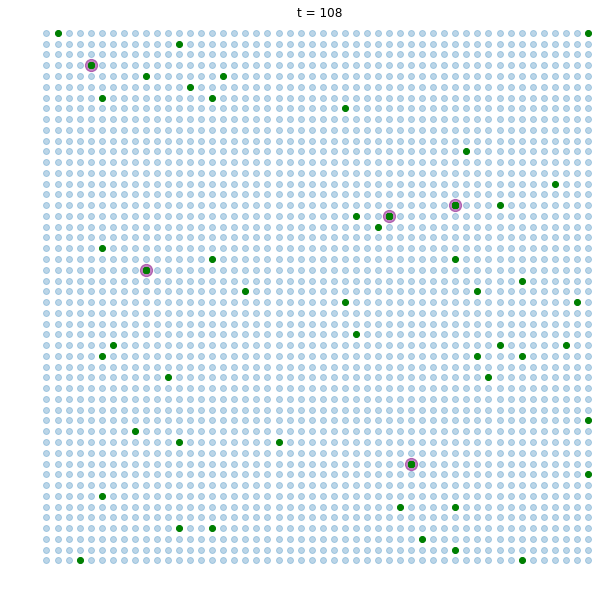

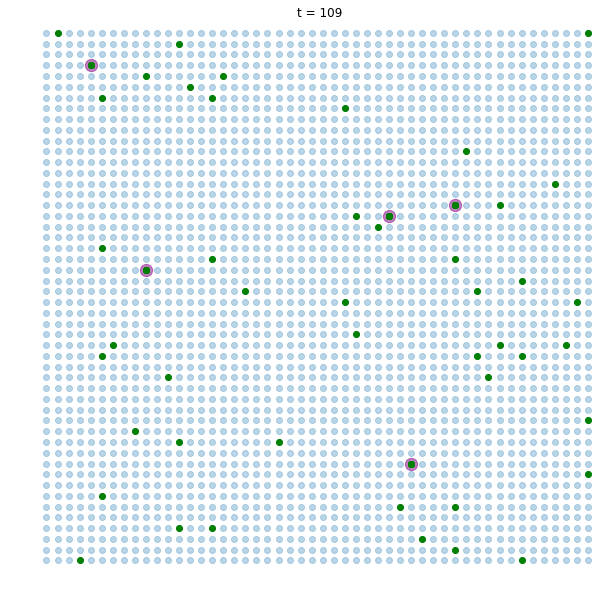

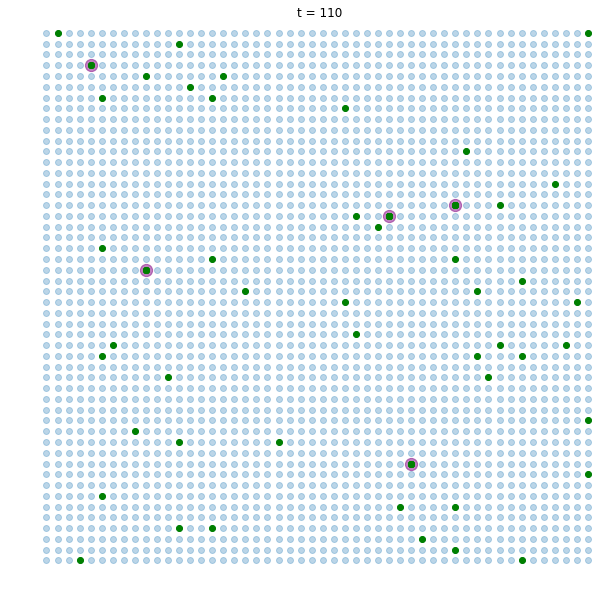

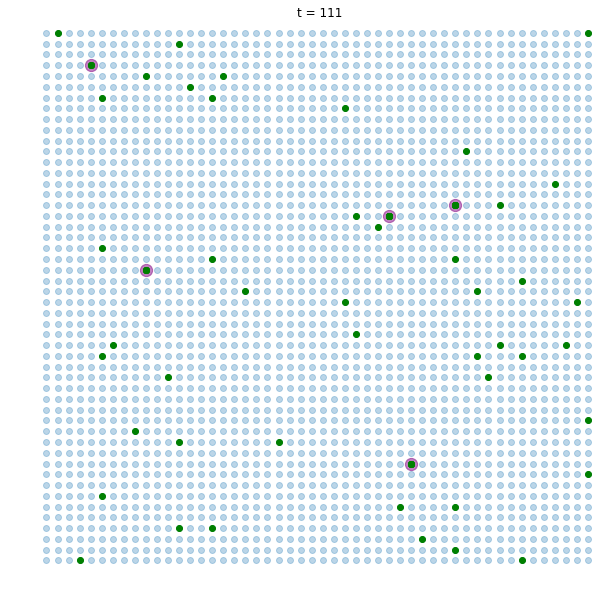

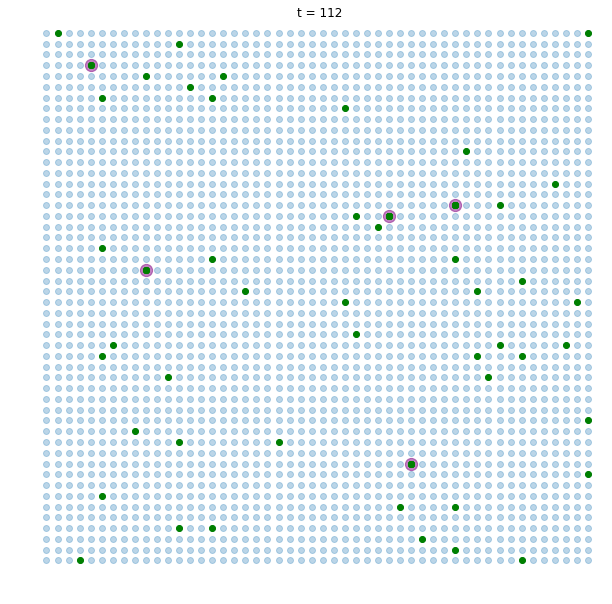

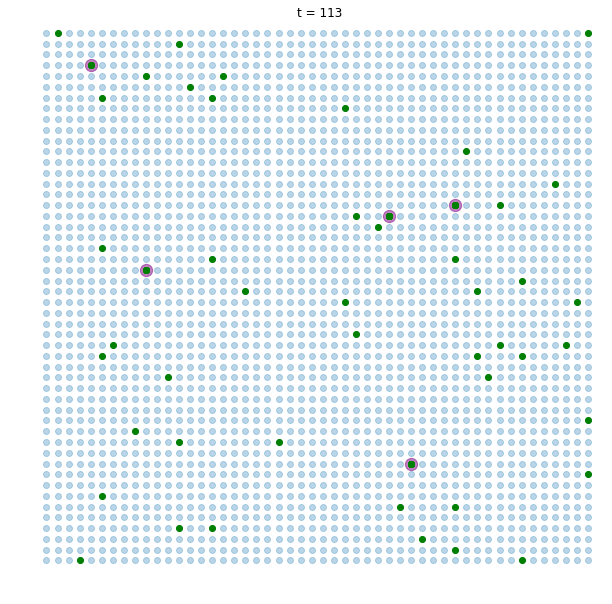

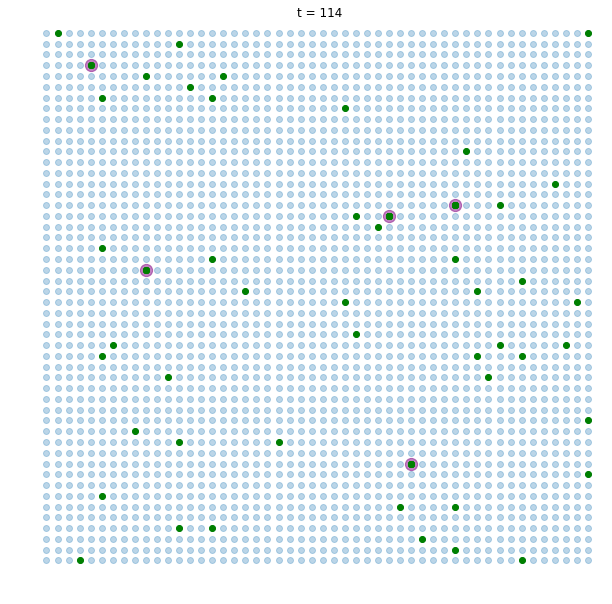

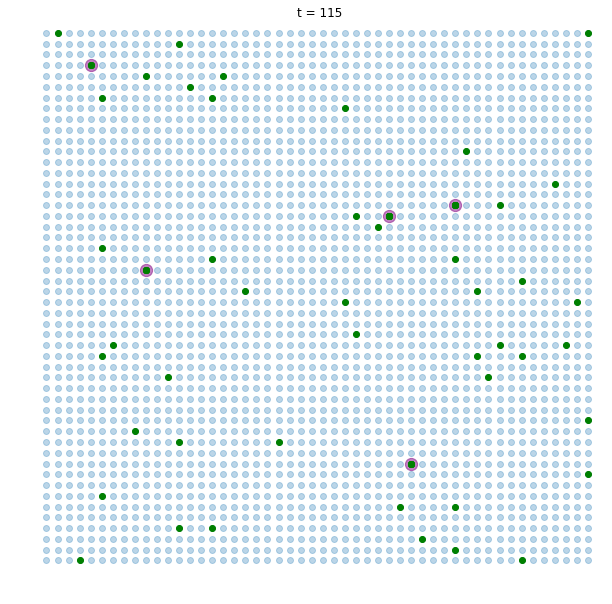

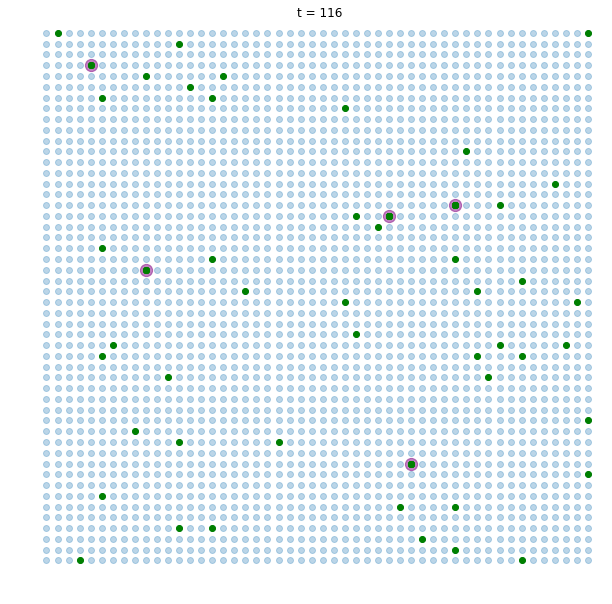

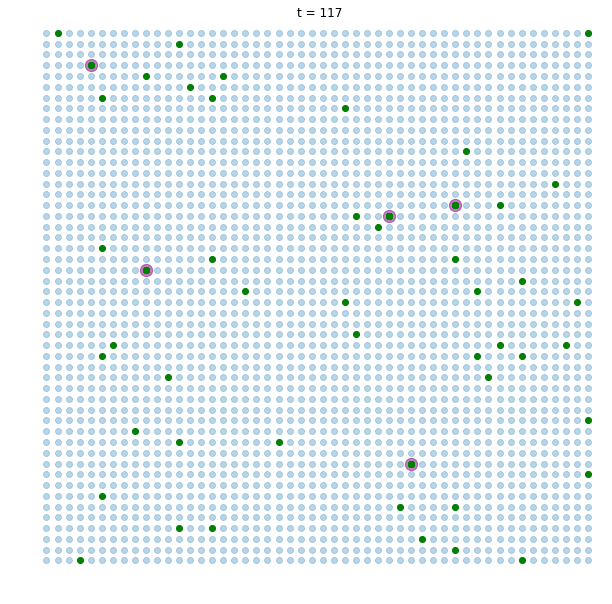

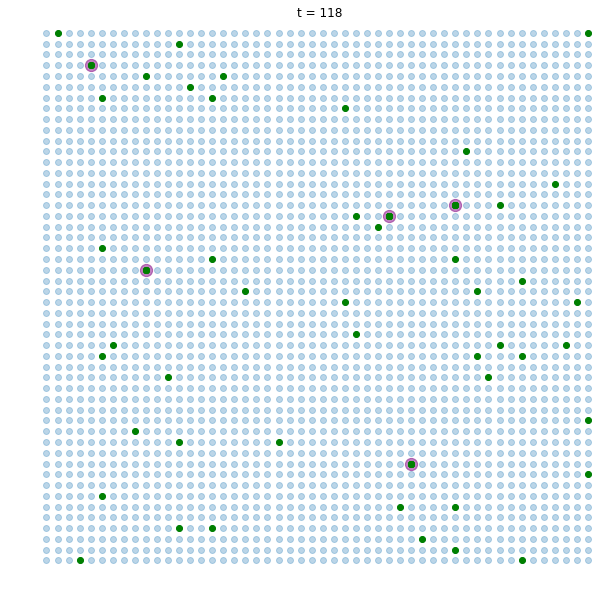

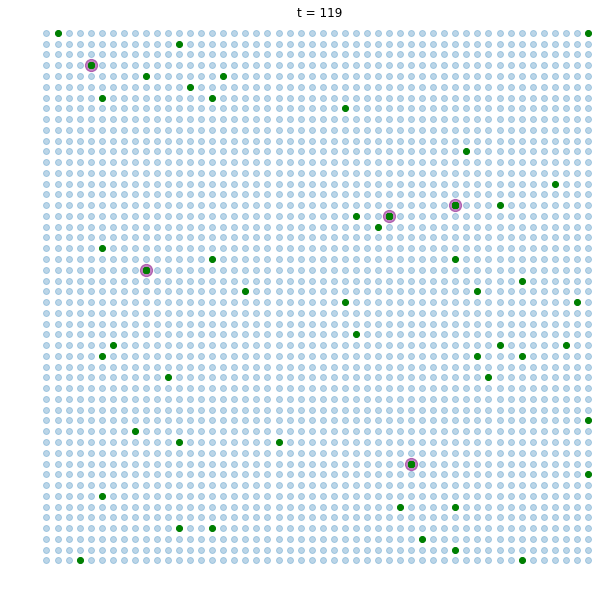

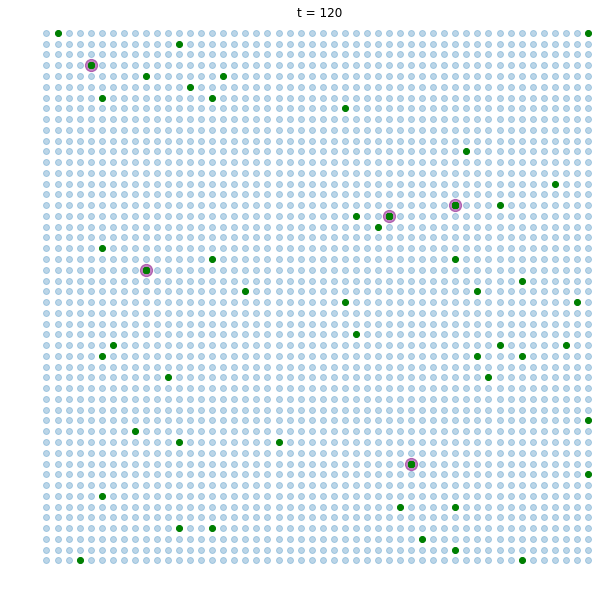

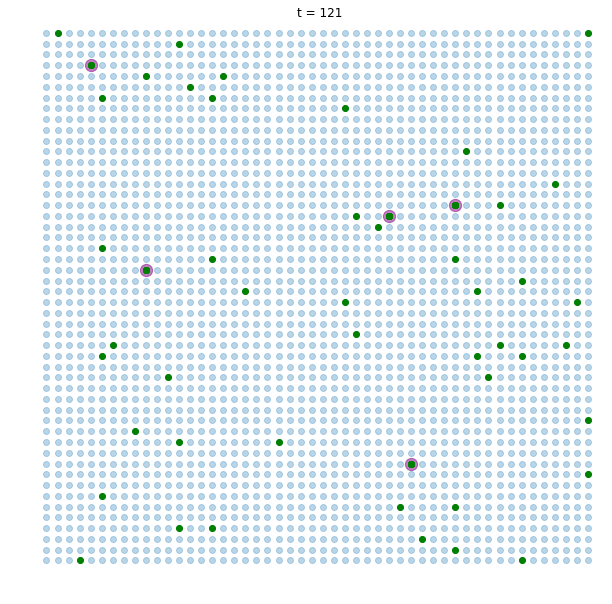

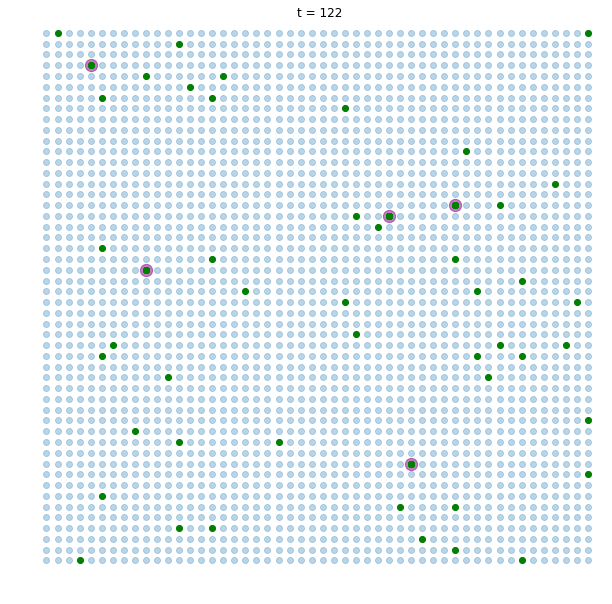

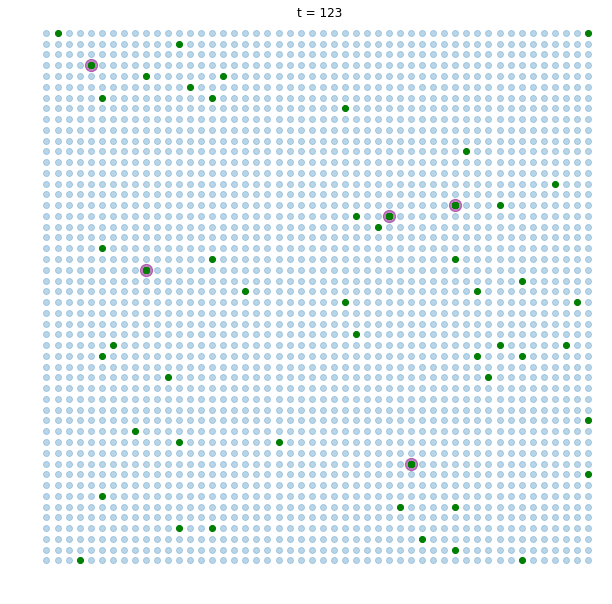

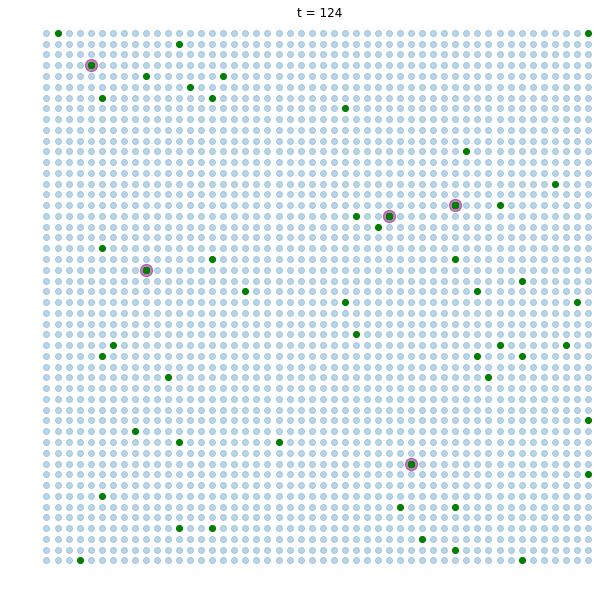

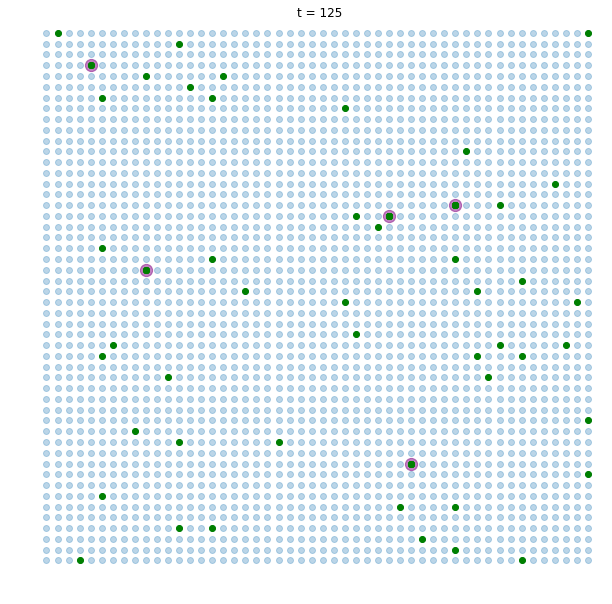

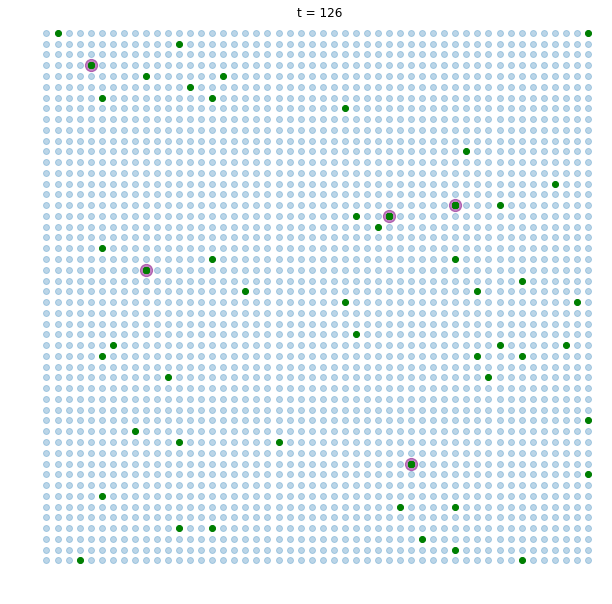

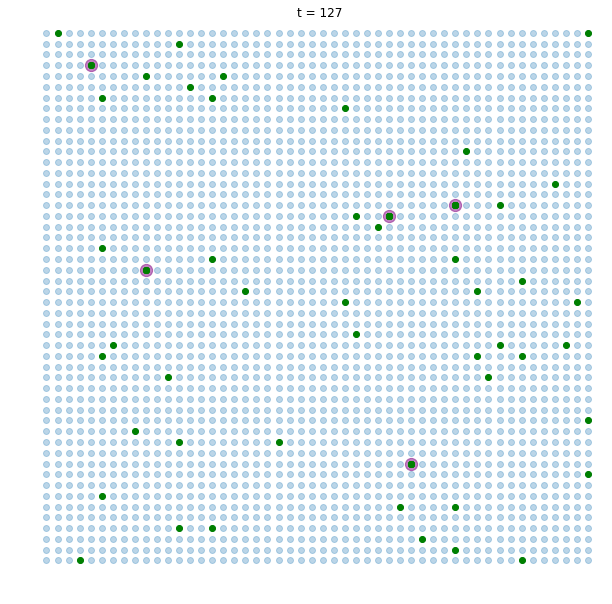

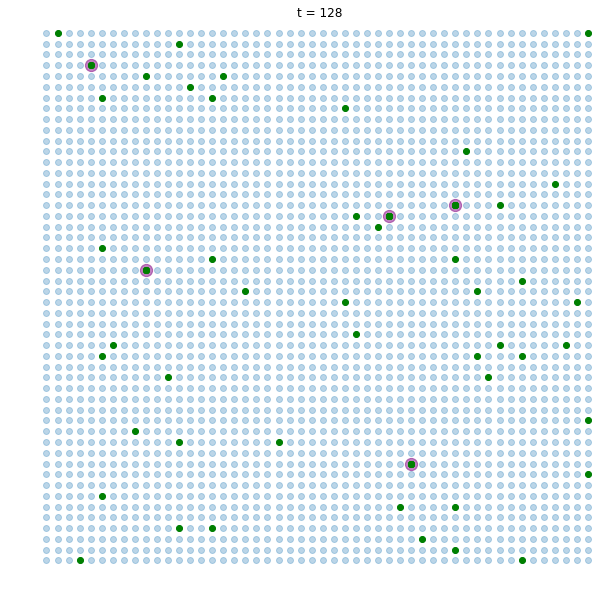

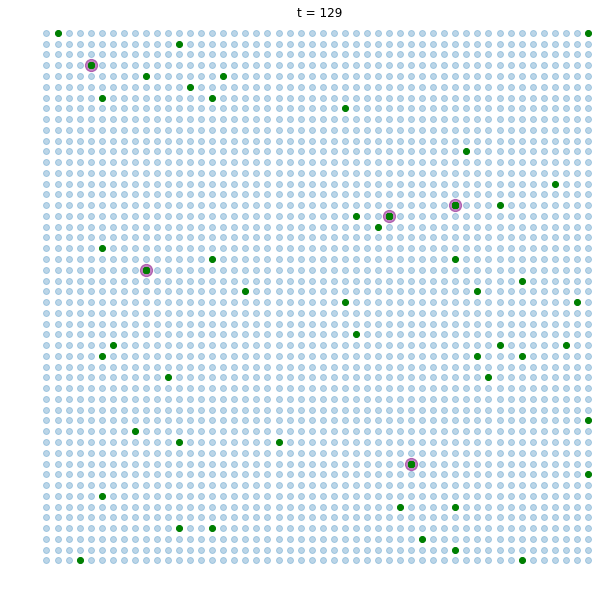

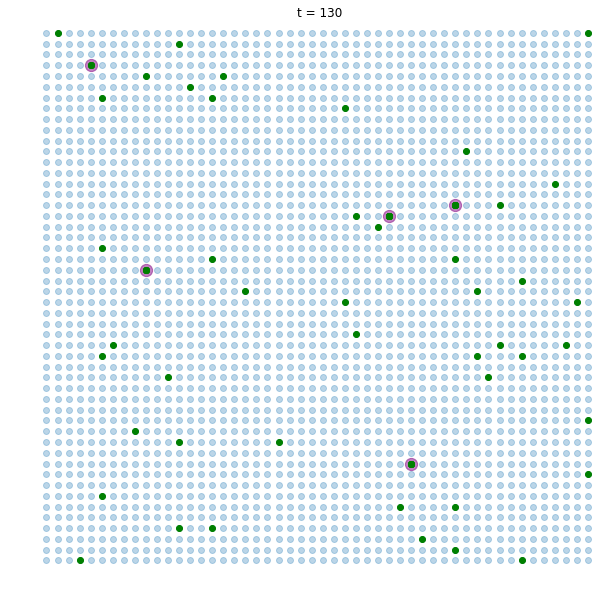

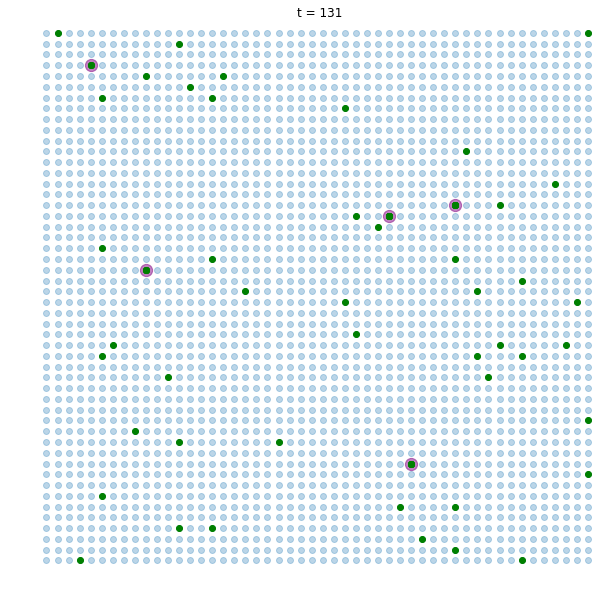

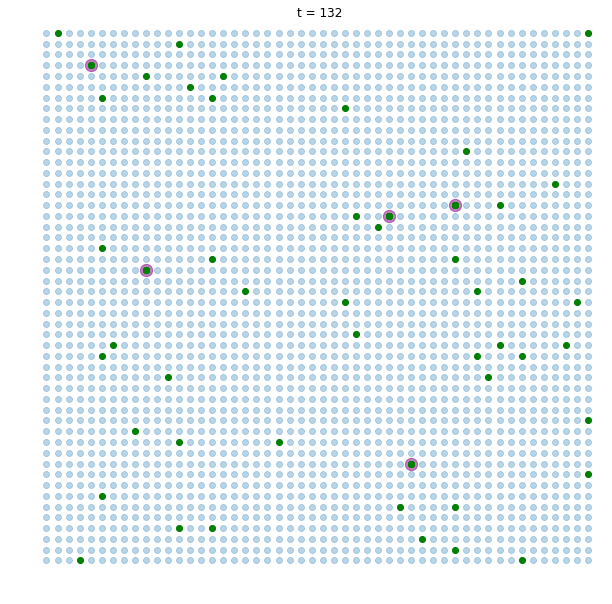

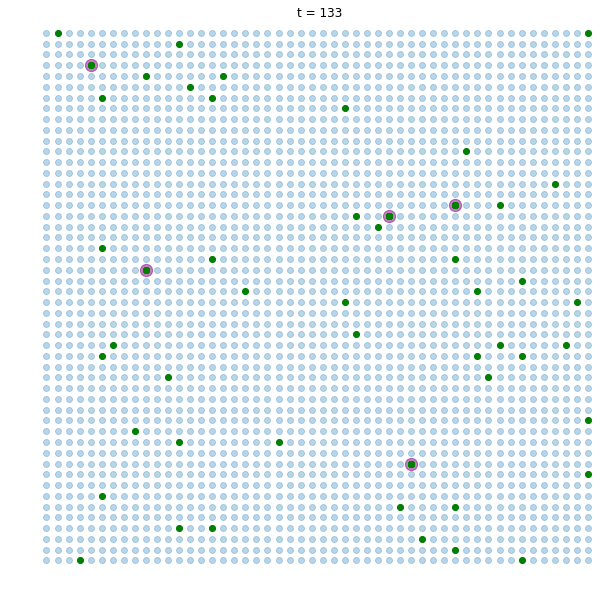

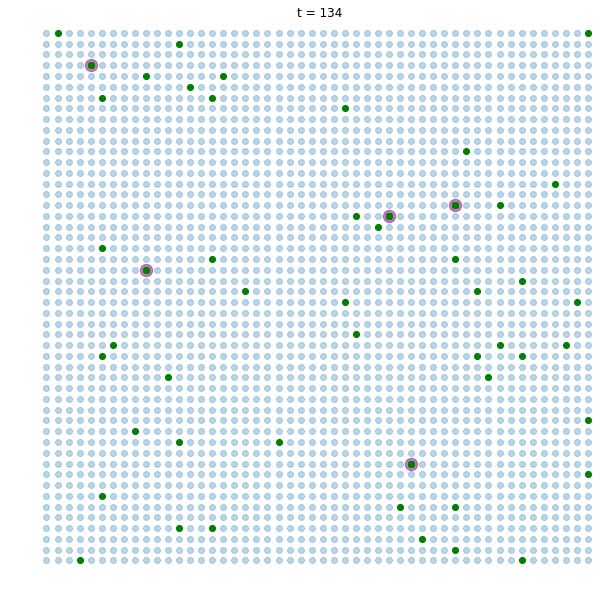

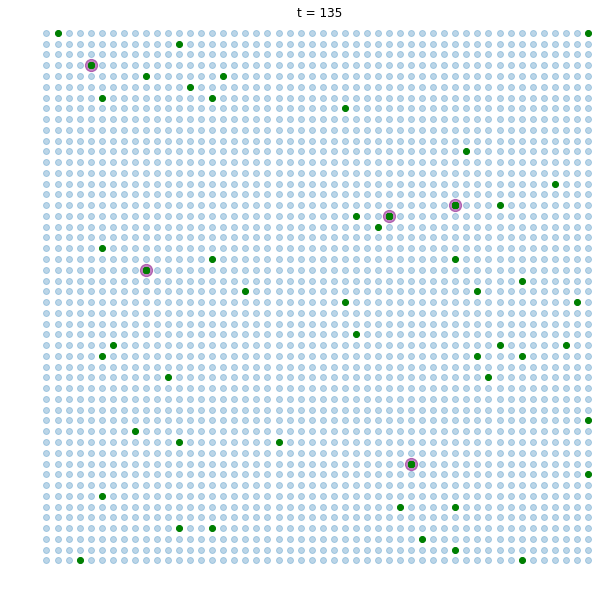

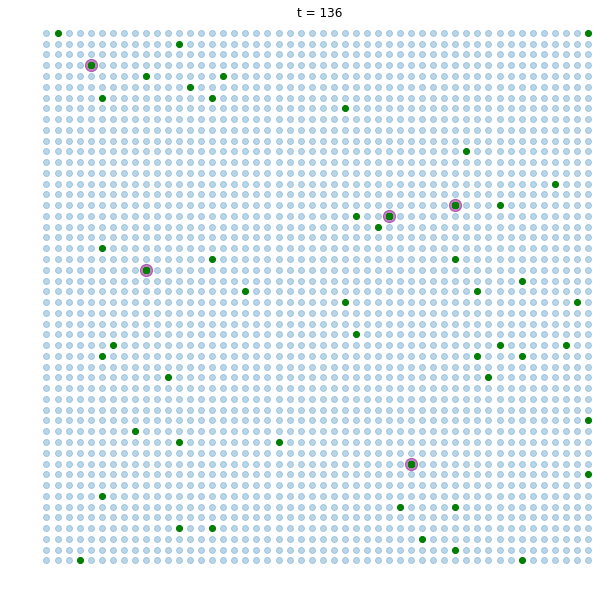

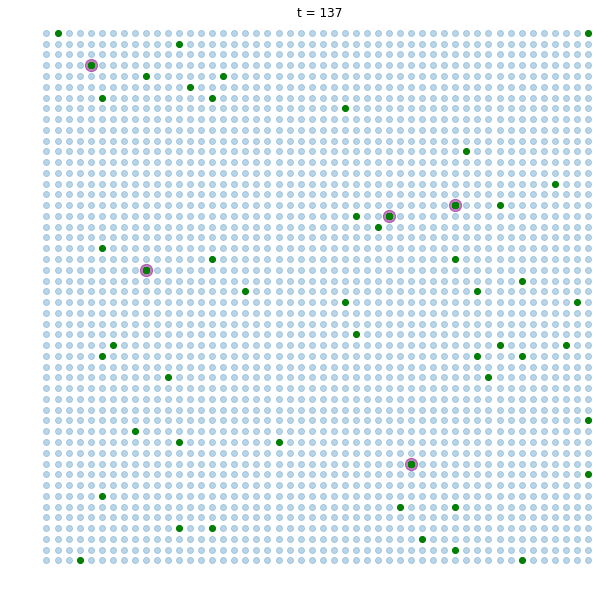

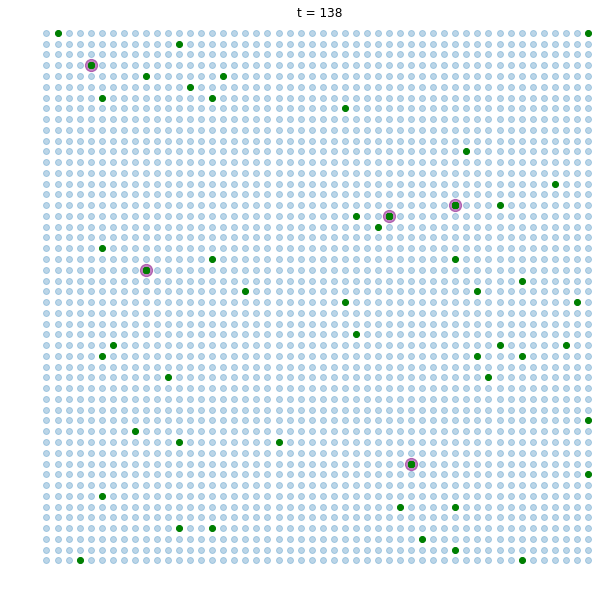

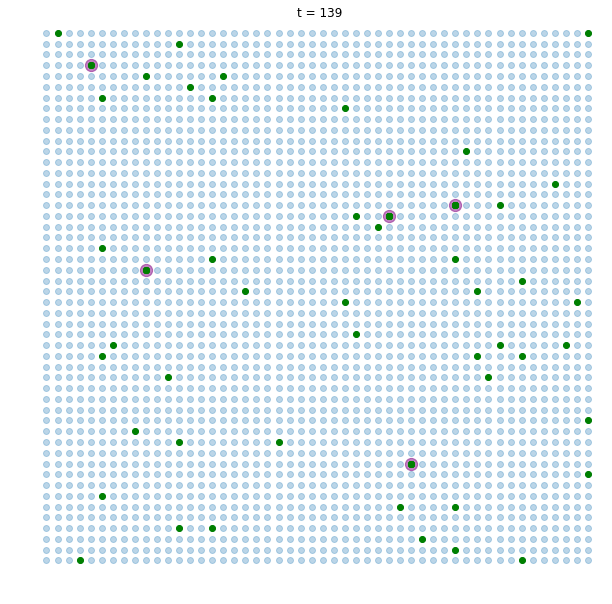

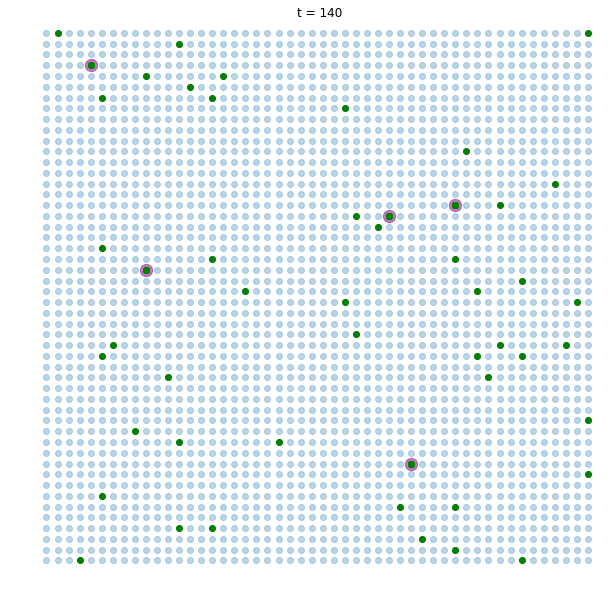

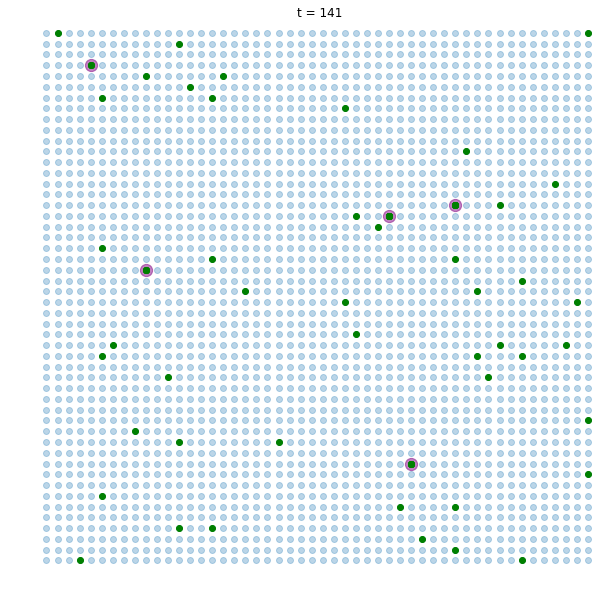

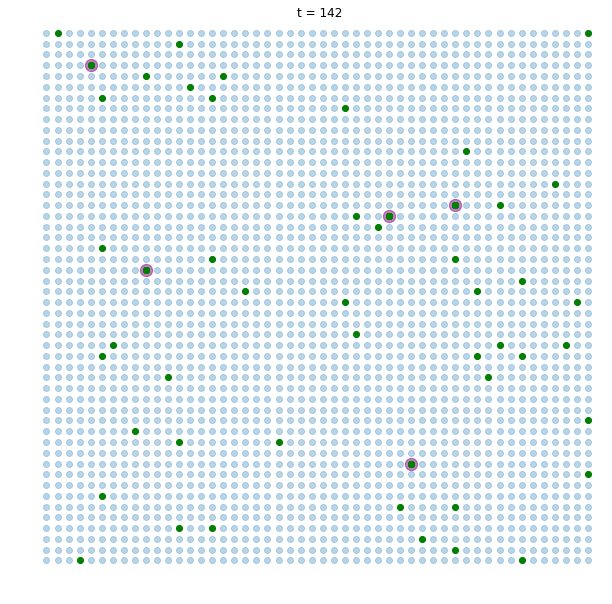

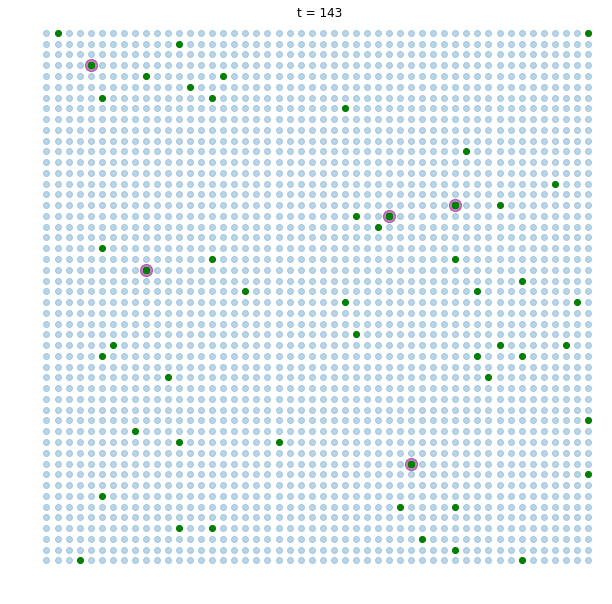

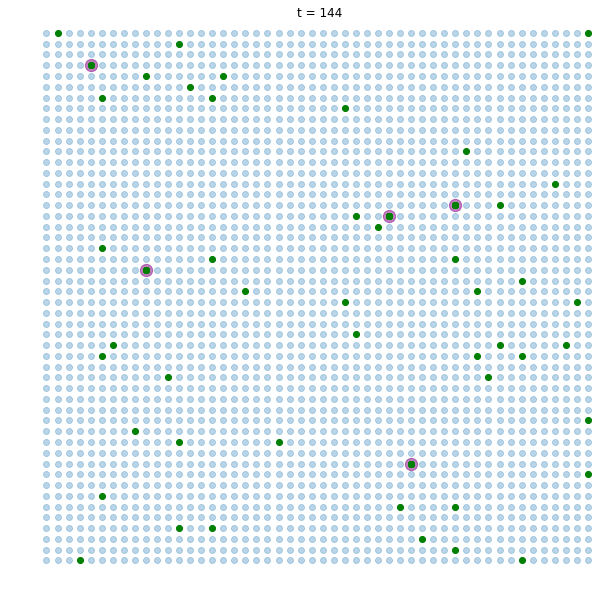

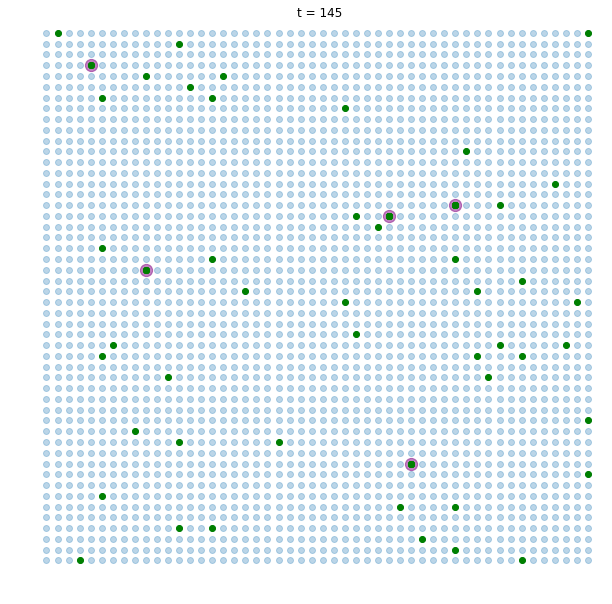

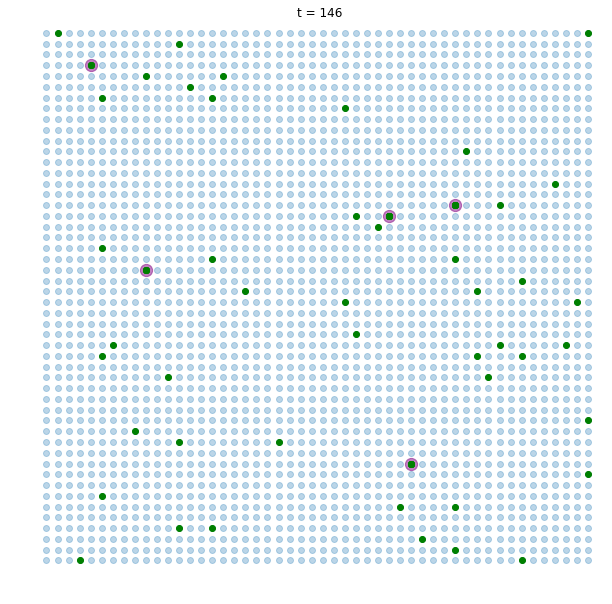

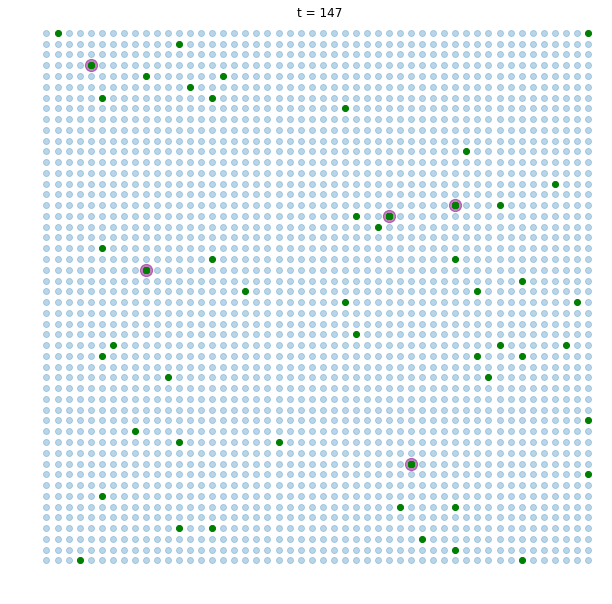

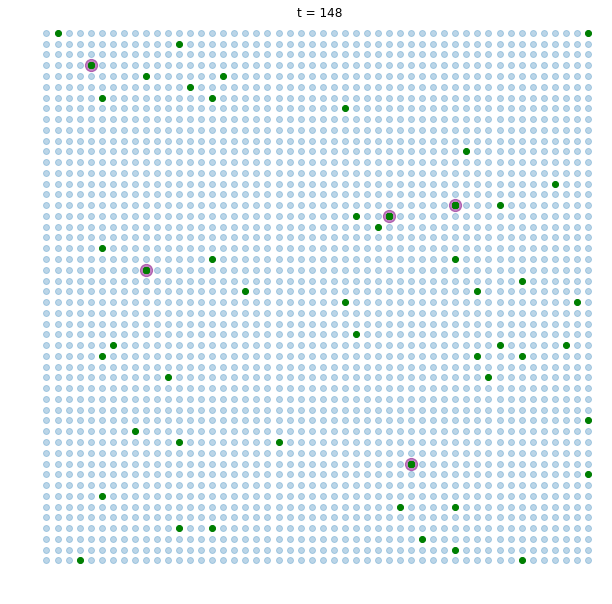

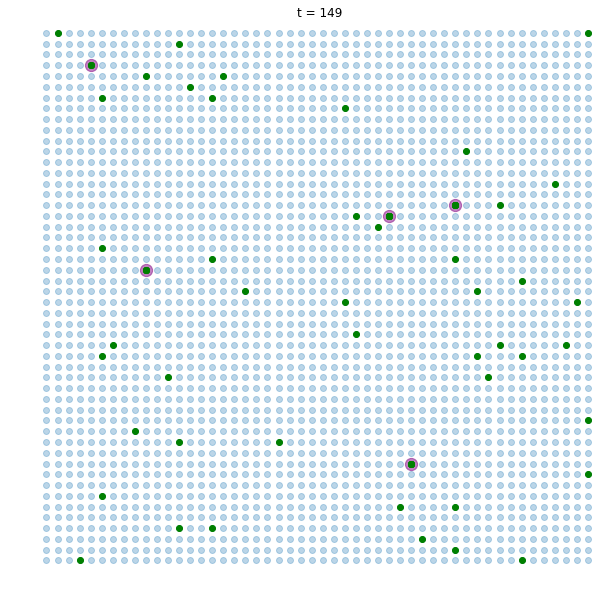

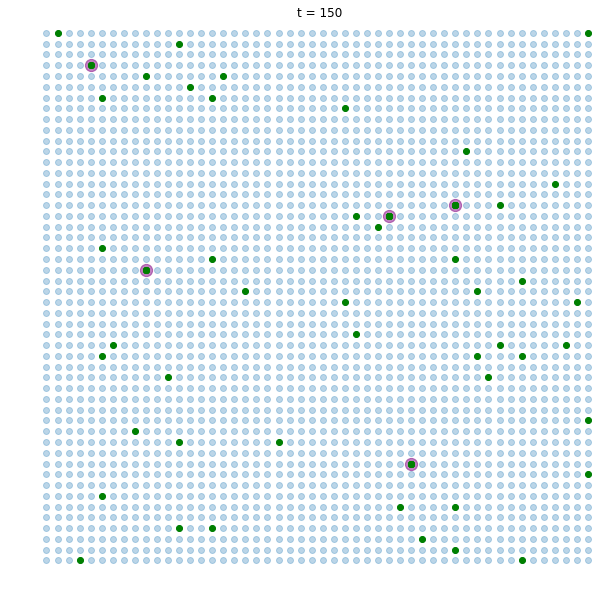

In [7]:
for i in range(150):
    seattle.iterate()
    seattle.plotGrid()

In [ ]:
# To implement later:
#anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=100, interval=20, blit=True)